---   
 <img align="left" width="75" height="75"  src="https://upload.wikimedia.org/wikipedia/en/c/c8/University_of_the_Punjab_logo.png"> 

<h1 align="center">Department of Data Science</h1>
<h1 align="center">Course: Tools and Techniques for Data Science</h1>

---
<h3><div align="right">Instructor: Muhammad Arif Butt, Ph.D.</div></h3>    

<h1 align="center">Lecture 4.3 (Linear Algebra for Machine Learning: Part-I)</h1><br>
<a href="https://colab.research.google.com/github/arifpucit/data-science/blob/master/Section-3-Python-for-Data-Scientists/Lec-3.01(NumPy-01-ArrayCreation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" width="350" height="300"  src="images/ds1.png"  >
<img align="center" width="400" height="250"  src="images/mathsandstat.jpeg"  >

<img align="center" width="900" height="250"  src="images/mathimg1.png"  >

## Learning agenda of this notebook

**Section I: (Overview of Linear Algebra: Vectors)**
1. Overview of Vectors 
    - Scalars vs Vectors
    - Mathematical and Graphical Representation of Vectors in $\mathbb{R}^2$
    - Mathematical and Graphical Representation of Vectors in $\mathbb{R}^3$
    - Hands on Implementation in Python    
2. Magnitude of a Vector (Vector Norms)
3. Direction of a Vector
4. Components of a Vector
    - Components of a Vector in $\mathbb{R}^2$
    - Components of a Vector in $\mathbb{R}^3$
5. Two Fundamental Vector Operations
    - Vector Addition
    - Multiplying a Vector with Scalar value
6. Basis and Unit Vectors
7. Linear combination and Span of Vectors
8. Vector to Vector Multiplication
    - Vector Dot Product
    - Vector Cross Product

**Section II: (Overview of Linear Alagebra: Matrices)**
1. Overview of Matrices
2. Matrices and its Types
    - Row Vector
    - Column Vector
    - Zero Matrix
    - Ones Matrix
    - Random Integer Matrix
    - Square Matrix
    - Symmetric Matrix
    - Triangular Matrix
    - Diagonal Matrix
    - Identity Matrix
    - Scalar Matrix
    - Orthogonal Matrix
3. Matrix Operations
    - Matrix Addition
    - Matrix-Scalar Multiplication
    - Matrix Multiplication (Hadamard Product)
    - Matrix Multiplication (Dot Product)
    - Matrix-Vector Multiplication
    - Frobenius Norms
    - Transpose of a Matrix
    - Determinant of a Matrix
    - Inverse of a Matrix
    - Trace of a Matrix
    - Rank of a Matrix

**Section III: (Solving System of Linear Equations)**
1. An overview of Linear Equations
    - What is a Linear Equation?
    - What is a system of Linear Equations?
2. How to solve a system of Linear Equations?
    - Substitution strategy
    - Elimination strategy
    - Graphing strategy
    - Consistent vs Inconsistent System of Linear Equations
    - Plotting a Linear Equation with Three Variables
    - Solving set of Three Linear Equations with Three variables
3. Solving System of Linear Equations using Matrix Algebra
    - Writing a system of Linear Equations in Matrix form
    - Solving system of Linear Equations using Gaussian Elimination Method
    - Solving system of Linear Equations using Gauss Jordan Method
    - Solving system of Linear Equations using Cramer's Rule
    - Solving system of Linear Equations using Matrix Inverse Method
    - Limitations of Matrix Inversion Method
4. Categories of System of Linear Equations
    - Standard systems
    - Overdetermined systems
    - Underdetermined systems
5. Solving Inconsistent Overdetermined System of Linear Equations using Least Squares Method
    - Modeling Linear Equations in Machine Learning with `2` variables
    - Modeling Linear Equations in Machine Learning with `m` variables
    - Simple Linear Regression using Least Squares Method
    - Multiple Linear Regression using Ordinary Least Squares (OLS) Method


**Section IV: (Linear Transformation and Matrices)**

**Section V:  (Eigen Decomposition and its Applications)**

**Section VI: (Singular Value Decomposition and its Applications)**

In [ ]:
# Unlike the other modules, we have been working so far, you have to download and install...
# To install this library in Jupyter notebook
import sys
!{sys.executable} -m pip install -q --upgrade pip

In [1]:
import numpy as np
import numpy.linalg
import math
import scipy
from matplotlib import pyplot as plt
from plot_helper import * # Helper functions: plot_vector, plot_linear_transformation, plot_linear_transformations

# <span style='background :lightgreen' > Section 1: (Overview of Linear Alagebra: Vectors) </span>
Some of the codes of this notebook are adapted from:
- [Jon Krohn's](https://github.com/jonkrohn).
- [Frank Cleary's](https://gist.github.com/frankcleary).
- [Engineers Code](https://github.com/engineersCode/EngComp4_landlinear).

## 1. Overview of Vectors

### a. Scalar vs Vectors

- A quantity that has magnitude but no particular direction is called scalar. For example, length, speed, mass, density, pressure, work, power, temperature, area, volume.
- A quantity that has magnitude as well as direction is called vector. For example, displacement, velocity, weight, force.
- For example, to describe a body’s velocity completely, we will have to mention its magnitude and direction. This means that we will have to mention how fast it is going in terms of distance covered per unit time and describe what direction it is headed. So, if we say a car is moving at 40 km/hr. This statement only describes the speed of the body. If someone says a car is moving at 40 km/hr and is headed North. This statement is describing the velocity of the car. It tells us the magnitude by which the car is moving and the direction in which it is headed.

<img align="right" width="400" height="400"  src="images/LA/whatsavector.png"  >

- We come accross the concept of vectors in the domains of physics, engineering, mathematics, computer science and more. Each field's interpretation of what a vector is a bit different:
     - In **physics**, we represent a vector as an arrow of specific length, representing its magnitude; and drawn at a specific angle, representing its direction. It can represent directional quantities like velocity, force, acceleration.
     - In **computer science**, a vector is an ordered list of numbers, stored in order. For example the price, area and number of bedrooms in a house. Or may be the age, weight and blood pressure of a person.
     - In **mathematics**, vectors are generic objects that behave in a certain way, when they are added or scaled:  $\mathbf{u}+\mathbf{v}$, $\alpha\mathbf{v}$.

- Vectors can be 2-dimensional, 3-dimensional and so on to N-dimensional. The two and three dimensional vecgtors are pretty easy to visualize. If we are able to understand and visualize the vector operations in 2-dimensions, we can map the concepts to larger dimensions as well. For example, to model the age, weight, daily hours of sleep, weekly hours of exercise, and blood pressure of an individual, we need a five dimensional vector.

### b. Mathematical and Graphical Representation of Vectors in $\mathbb{R}^2$
#### Algebraically
- Algebraically, vectors are often represented using a lowercase character, having comma separated list of numbers written horizontally or may be numbers written from top to bottom. 
- The **length** of the vector is the number of scalar values in the vector, and is also called the `order/rank/degree/dimension of the vector`. 
- For example, in $\mathbb{R}2$ space, algebraically a vector $\overrightarrow{\rm v}$ can be written as:<br>

$\hspace{2 cm}\overrightarrow{\rm v} = (a, b) = \begin{bmatrix} a \\ b \end{bmatrix} \hspace{2 cm}\overrightarrow{\rm v} = (2, 5) = \begin{bmatrix} 2 \\ 5 \end{bmatrix}$

$\hspace{2 cm}\overrightarrow{\rm v} = a\hat{i} +  b\hat{j} \hspace{3 cm} \overrightarrow{\rm v} = 2\hat{i} +  5\hat{j}$

$\hspace{2 cm}\overrightarrow{\rm v} = a\begin{bmatrix} 1 \\ 0  \end{bmatrix} +  b\begin{bmatrix} 0 \\ 1 \end{bmatrix} \hspace{1.5 cm} \overrightarrow{\rm v} = 2\begin{bmatrix} 1 \\ 0 \end{bmatrix} +  5\begin{bmatrix} 0 \\ 1 \end{bmatrix} $



#### Graphically/Geometrically
- One can think of a vector as a point in space. Graphically/Geometrically, vectors can be represented by a directed line segment in cartesian coordniate system, whose length is the magnitude of the vector and the angle represents its direction.

<img align="left" width="300" height="300"  src="images/LA/2DCoordinates.png"  >

<img align="right" width="500" height="500"  src="images/LA/translate.png"  >


### c. Mathematical and Graphical Representation of Vectors in $\mathbb{R}^3$

#### Algebraically

- Algebraically, vectors of rank 3 consists of three scalar values written as comma separated list of numbers horizontally or may be from top to bottom. 
- The **length** of the vector is the number of scalar values in the vector, and is also called the `order/rank/degree/dimension of the vector`, in this case it is three. 

- Algebraically, in $\mathbb{R}3$ space, a vector $\overrightarrow{\rm v}$ can be written as:<br>

$\hspace{2 cm}\overrightarrow{\rm v} = (a, b, c) = \begin{bmatrix} a \\ b \\ c \end{bmatrix} \hspace{5 cm}\overrightarrow{\rm v} = (2, 5, 3) = \begin{bmatrix} 2 \\ 5 \\ 3 \end{bmatrix}$

$\hspace{2 cm}\overrightarrow{\rm v} = a\hat{i} +  b\hat{j} +  c\hat{k} \hspace{5 cm} \overrightarrow{\rm v} = 2\hat{i} +  5\hat{j} +  3\hat{k}$

$\hspace{2 cm}\overrightarrow{\rm v} = a\begin{bmatrix} 1 \\ 0 \\0 \end{bmatrix} +  b\begin{bmatrix} 0 \\ 1 \\0 \end{bmatrix} +  c\begin{bmatrix} 0 \\ 0 \\1 \end{bmatrix} \hspace{3 cm} \overrightarrow{\rm v} = 2\begin{bmatrix} 1 \\ 0 \\0 \end{bmatrix} +  5\begin{bmatrix} 0 \\ 1 \\0 \end{bmatrix} +  3\begin{bmatrix} 0 \\ 0 \\1 \end{bmatrix}$



<img align="right" width="300" height="300"  src="images/LA/vectorin3d.png"  >

#### Graphically/Geometrically
- A 3-D coordinate system has 3 dimensions or can be regarded as having 3 perpendicular axes: x, y, and z-axes. Such a system is called a 3-dimensional rectangular coordinate system.
- Note, the third axis is the Z-axis, and all the three axis are perpedicular to each other.
- The vector $\overrightarrow{\rm v}$ is shown in bold red having its three components a, b and c along the x, y and z axis respectively.
- We can visualize vectors upto three dimensions, however, beyond three dimensions, we normally use algebraic notations.

### d. Hands on Implementation in Python

**Example 1:** Creating Vector $[3,2]$ having tail at origin

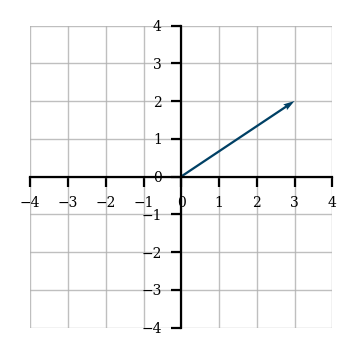

In [2]:
# To better visualize and plot, you need to import following module/script having three helper functions
# plot_vector(), plot_linear_transformation, plot_linear_transformations
from plot_helper import *
v = [(3,2)]        # A list having a single tuple of two elements representing x and y component of vector
plot_vector(v)

**Example 2:** Creating four vectors, one in each quadrant having their tails at origin

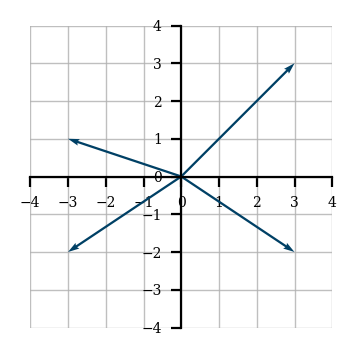

In [3]:
v = [(3, 3), (-3, 1), (-3,-2),(3,-2)]  # A list having four tuples of two elements each
plot_vector(v)      

**Example 3:** Creating a vector $[4,3]$ having its tail at $[2,2]$

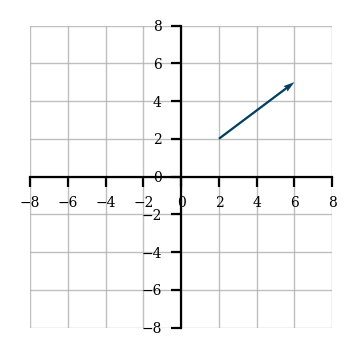

In [4]:
v = [(4,3)]     # A list having a single tuple of two elements representing x and y component of vector
tail = [(2,2)]   # A list having a single tuple of two elements representing tail of vector
plot_vector(v, tail) 

**Example 4:** Three vectors with their tails at $[2,2]$

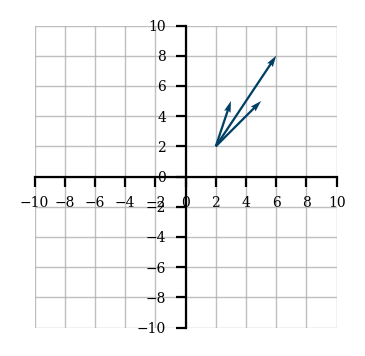

In [5]:
v = [(1, 3), (3, 3), (4, 6)]   # A list having three tuples of two elements each
tail = [(2, 2)]                # A list having a single tuple of two elements
plot_vector(v, tail) 

**Example 5:** Three vectors with different tails

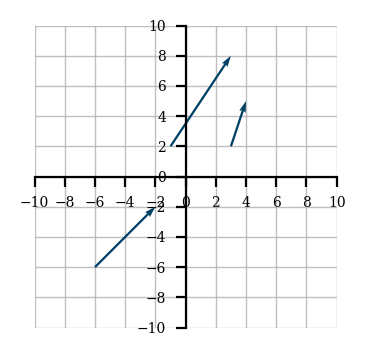

In [6]:
v = [(1, 3), (4, 4), (4, 6)]
tails = [(3, 2), (-6, -6), (-1, 2)]
plot_vector(v, tails)  

**Example 6:** Translate above three vectors to origin

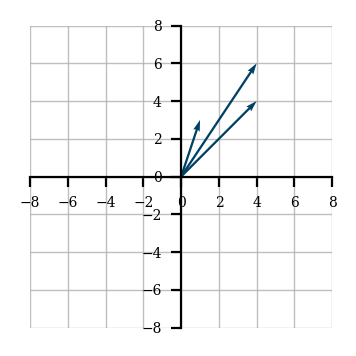

In [7]:
v = [(1, 3), (4, 4), (4, 6)]
tails = [(0, 0), (0, 0), (0, 0)]
plot_vector(v, tails)  

## 2. Magnitude of a Vector (Vector Norms)
- The length of a vector is a `non-negative` number that describes the extent of the vector in space, and is sometimes referred to as the vector’s magnitude or the norm.
- We can compute the magnitude of a 2-dimensional, 3-dimensional and so on to a n-dimensional vector using two ways:
    - By graphically drawing the vector in a coordinate system
    - By using different Vector Norms.



####  L<sup>2</sup> Norm
- The most commonly used Norm that is used to calculate the magnitude of a vector is L<sup>2</sup> Norm.
- The L<sup>2</sup> norm calculates the distance of the vector coordinate from the origin of the vector space. As such, it is also known as the `Euclidean norm` as it is calculated as the `Euclidean distance from the origin`. The result is a `positive` distance value. 
- The L<sup>2</sup> norm is calculated as the `square root` of the sum of the squared vector values.

<h3 align="center">      $\left\lVert  x \right\rVert_2$   $=$   $\sqrt{\sum_{i=1}^n x_i^2}$        </h3>


#### Squared L<sup>2</sup> Norm
- The squared L<sup>2</sup> Norm is computationally cheaper to use as compared to L<sup>2</sup> Norm.
- The squared L<sup>2</sup> Norm equals to the dot product of a vector with its transpose.
- The squared L<sup>2</sup> norm is calculated as the sum of the squared vector values.

<h3 align="center">      $\left\lVert  x \right\rVert_2$   $=$   $\sum_{i=1}^n x_i^2$        </h3>




####  L<sup>1</sup> Norm
- Another way to calculate the magnitude of a vector is using the L<sup>1</sup> Norm. 
- The L<sup>1</sup> norm is calculated as the sum of the absolute vector values. The L<sup>1</sup> norm  is also known as `taxicab norm` or the `Manhattan norm`.
- In several machine learning applications, it is important to discriminate between elements that are exactly zero and elements that are small but nonzero. In such cases, we use the L<sup>1</sup> norm.

<h3 align="center">      $\left\lVert  x \right\rVert_1$   $=$   $\sum_{i=1}^n |x_i|$        </h3>





####   Max Norm (L<sup>∞</sup>)
- The length of a vector can be calculated using the maximum norm, also called max norm (L<sup>∞</sup>). Max norm of a vector is referred to as (L<sup>∞</sup>)
- The max norm is calculated as returning the `maximum value` of the vector, hence the name.

<h3 align="center">      $\left\lVert  x \right\rVert_∞$   $=$   $\max_{i=1}^n$ $|x_i|$        </h3>

###  Check your Concepts
Determine the magnitude of following vectors:<br>
- X = 20m, North
- A = (-1, -2/3)
- F = (4, 10)
- V = (2, 5, 3)
- T = (0, 2, -1)
- $\overrightarrow{\rm AB}$ whose starting point is at A = (-1,0, 3) and ending point is B = (5,2,0)

###  Hands on Implementation in Python
**Example:** Determine the magnitude of vector $\overrightarrow{\rm AB}$ whose starting point is at $A = (-2, 2)$ and ending point is $B = (2, 8)$

v =  [4 6]
L1 Norm =  10
L2 Norm =  7.211102550927978
Squared L2 Norm =  52
L∞ =  6


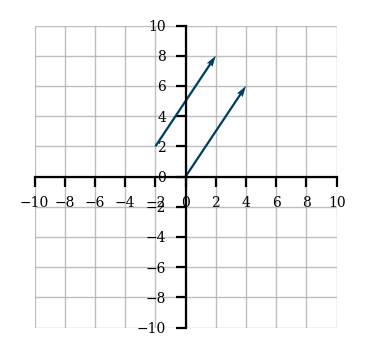

In [8]:
import numpy as np
# Translating the vector to origin
a = np.array([-2, 2])
b = np.array([2, 8]) 
v = np.array([b[0]-a[0], b[1]-a[1]])   # v = (4,6)

# Plotting both the vectors
vectors = [v, v ]        # A list having two vectors
tails = [[-2,2], [0,0]]
plot_vector(vectors, tails)  

print("v = ", v)
# calculating L1 norm
l1 = numpy.linalg.norm(v, ord=1)
l1 = np.abs(v[0]) + np.abs(v[1])
print("L1 Norm = ",l1)

# calculating L2 norm
l2 = numpy.linalg.norm(v, ord=2)
l2 = (v[0]**2 + v[1]**2 )**(1/2)
print("L2 Norm = ",l2)

# calculating Squared L2 norm
sq_l2 = (numpy.linalg.norm(v, ord=2))**2
sq_l2 = (v[0]**2 + v[1]**2 )
print("Squared L2 Norm = ",sq_l2)

# calculating Max norm
maxnorm = numpy.linalg.norm(v, ord=np.inf)
maxnorm = np.max([np.abs(v[0]), np.abs(v[1])])
print("L∞ = ", maxnorm)

> A vector having its tail at origin is called position vector

## 3. Direction of a Vector
- The direction of the vector v is the measure of the angle that it makes with the horizontal in the plane.
- There are two commonly used units of measurement for angles. 
    - **Degrees:** A circle is divided into 360 equal degrees, and a degree is further divided into 60 equal parts called minutes. So seven and a half degrees can be called 7 degrees and 30 minutes, written 7° 30'. Each minute is further divided into 60 equal parts called seconds, and, for instance, 2 degrees 5 minutes 30 seconds is written 2° 5' 30". 
    - **Radians:** The other common measurement for angles is radians. One radian is the angle made at the center of a circle by an arc whose length is equal to the radius of the circle. The circumference of a circle is 2π, so it follows that 360° equals 2π radians. 
    
<img align="center" width="900" height="500"  src="images/LA/angles.png"  >


- **Geometrically Measuring the Direction of a Vector**:
    - The most common way is to measure the angle by the counterclockwise movement with the positive x-axis. This way the angle is always positive. 
    - Another way is to measure the smallest angle that a vector form along the horizontal axis. If it is measured clockwise the angle is written with a negative sign.
    
- **Mathematically Measuring the Direction of a Vector**:
    - By using Inverse Tangent Formula:
<h3 align="center">      $\theta = tan^{-1} (y/x)$        </h3>

- **Note:** 
    - The inverse Tangent formula returns the angle in radians, which you can convert to degrees by multiplying it by 180/pi
    - The inverse Tangent formula gives the shortest angle from either the positive or negative x-axis in either clock-wise or counter-clockwise direction. 

**Example 1:** Find the direction of a vector whose coordinates are $(4, 6)$

v =  [4 6]
Angle in radians:  0.982793723247329
Shortest angle from x-axis:  56.309932474020215
Counter-Clockwise angle in degrees from positive x-axis:  56.309932474020215


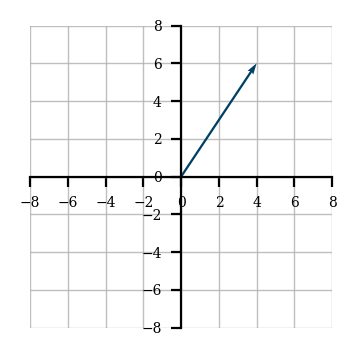

In [9]:
v = np.array([4, 6])
print("v = ", v)
theta_rad = math.atan(v[1]/v[0])     # acos, asin, and atan take a ratio as input and return an angle in radians. 
theta_deg = theta_rad*(180/math.pi)  # so we need to convert it into degrees
print("Angle in radians: ", theta_rad)
print("Shortest angle from x-axis: ", theta_deg)
# Since, both the coordinates are positive, that means the angle exists in the first quadrant
# So the angle is already computed from positive x-axis
theta_deg = theta_deg + 0
print("Counter-Clockwise angle in degrees from positive x-axis: ", theta_deg)
plot_vector([v]) 

**Example 2:** Find the direction of a vector whose coordinates are $(-4, 6)$

v =  [-4  6]
Angle in radians:  -0.982793723247329
Shortest angle from x-axis:  -56.309932474020215
Counter-Clockwise angle in degrees from positive x-axis:  123.69006752597979


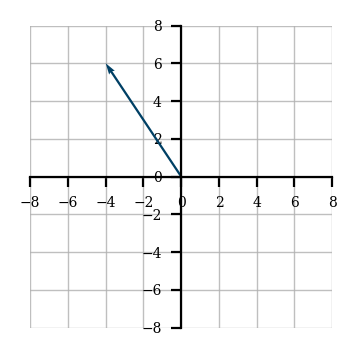

In [10]:
v = np.array([-4, 6])
print("v = ", v)
theta_rad = math.atan(v[1]/v[0])    # acos, asin, and atan take a ratio as input and return an angle in radians. 
theta_deg = theta_rad*(180/math.pi) # so we need to convert it into degrees
print("Angle in radians: ", theta_rad)
print("Shortest angle from x-axis: ", theta_deg)
# Since, x-coordinate is negative and y-coordinate is positive, that means, the angle exists in the second 
# quadrant. Since, the angle is negative, that means, it is measured from negative x-axis in clock-wise direction
# So we have to add 180 degree to get the angle from positive x-axis in counter-clockwise direction
theta_deg = theta_deg + 180
print("Counter-Clockwise angle in degrees from positive x-axis: ", theta_deg)
plot_vector([v]) 

**Example 3:** Find the direction of a vector whose coordinates are $(-4, -6)$

v =  [-4 -6]
Angle in radians:  0.982793723247329
Angle in degrees:  56.309932474020215
Angle in degrees from x-axis:  236.30993247402023


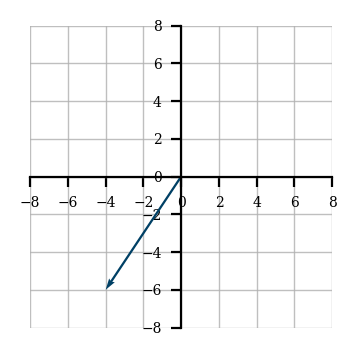

In [11]:
v = np.array([-4, -6])
print("v = ", v)
theta_rad = math.atan(v[1]/v[0])     # acos, asin, and atan take a ratio as input and return an angle in radians. 
theta_deg = theta_rad*(180/math.pi)  # so we need to convert it into degrees
print("Angle in radians: ", theta_rad)
print("Angle in degrees: ", theta_deg)
# Since, both the coordinates are negative, that means, the angle exists in the third quadrant
# Since, the angle is positive, that means, it is measured from negative x-axis in counter-clockwise direction
# So we have to add 180 degree to get the angle from positive x-axis in counter-clockwise direction
theta_deg = theta_deg + 180
print("Angle in degrees from x-axis: ", theta_deg)
plot_vector([v]) 

**Example 4:** Find the direction of a vector whose coordinates are $(4, -6)$

v =  [ 4 -6]
Angle in radians:  -0.982793723247329
Shortest angle from x-axis:  -56.309932474020215
Counter-Clockwise angle in degrees from positive x-axis:  303.69006752597977


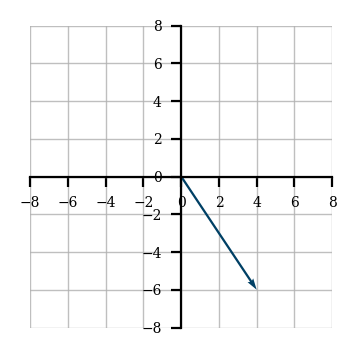

In [12]:
v = np.array([4, -6])
print("v = ", v)
theta_rad = math.atan(v[1]/v[0])     # acos, asin, and atan take a ratio as input and return an angle in radians. 
theta_deg = theta_rad*(180/math.pi)  # so we need to convert it into degrees
print("Angle in radians: ", theta_rad)
print("Shortest angle from x-axis: ", theta_deg)
#Since, x-coordinate is positive and y-coordinate is negative, that means, the angle exists in the fourth quadrant
#Since, the angle is negative, that means, it is measured from positive x-axis in clockwise direction
#So we have to add 360 degree to get the angle from positive x-axis in counter-clockwise direction
theta_deg = theta_deg + 360
print("Counter-Clockwise angle in degrees from positive x-axis: ", theta_deg)
plot_vector([v]) 

## 4. Components of a Vector

<img align="right" width="400" height="300"  src="images/LA/vector-components.jpg"  >

### a. Components of a Vector in $\mathbb{R}^2$

- Splitting of an angled vector into two vectors directed towards the coordinate axes in a two-dimensional coordinate system are defined as vector components.
- The two components of any vector can be found through the method of vector resolution. 
- This vector say $F$ is making an angle of 30 degrees with the positive x-axis in counter clockwise direction. The head of this vector is 5 units towards East and 2 units towards North. These two lines are the vector components of the vector $F$. Moreover, these two components are supposed to form a right-angled triangle. 
- We can use these two components are then used to find the resultant vector’s magnitude and direction, which is AB.

 $ cosθ = \frac{F_x}{F} \implies F_x = F.cosθ $ <br>
 $ sinθ = \frac{F_y}{F} \implies F_y = F.sinθ $

**Example 1:** A force $\overrightarrow{\rm F}$ of 10 N is applied at an angle of 30º along the horizontal surface. Resolve the vector into its components. Verify your answer by calculating its magnitude and direction from its components.

Fx: 8.66 N
Fy: 5.00 N
|F| =  10.0
Angle: 30.00 degrees


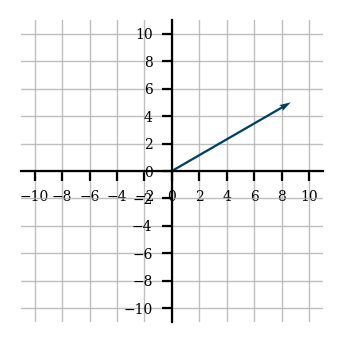

In [13]:
# calculating x and y components of vector F
fx = 10*math.cos(30 * math.pi/180)      # sin, cos and tan take input angle in radians and return a real value. 
fy = 10*math.sin(30 * math.pi/180)      # sin, cos and tan take input angle in radians and return a real value. 
print("Fx: %.2f" %fx, "N")
print("Fy: %.2f" %fy, "N")

# calculating magnitude for verification
f = numpy.linalg.norm([fx, fy], ord=2)
print("|F| = ",f)

# calculating angle for verification
theta_rad = math.atan(fy/fx)     # returned angle is in radians. 
theta_deg = theta_rad*(180/math.pi)  # convert it into degrees
# Since, x and y-components are both positive, that means the vector is in first quadrant
print("Angle: %.2f" % theta_deg, "degrees")

# Plot the vector
plot_vector([(fx,fy)]) 

**Example 2:** Given a vector $\mathbf{v}$ having magnitude of 4 and direction of 45 degrees in  $\mathbb{R}^2$. Find out its x and y-components.
Verify your answer by calculating its magnitude and direction from its components.<br>

vx: 2.83
vy: 2.83
|v| =  4.0
Angle: 45.00 degrees


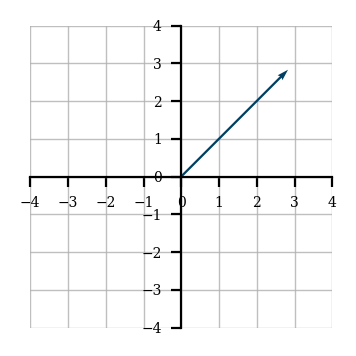

In [14]:
# calculating x and y components of vector F
vx = 4*math.cos(45 * math.pi/180)  # sin, cos and tan take input angle in radians and return a real value. 
vy = 4*math.sin(45 * math.pi/180)  # sin, cos and tan take input angle in radians and return a real value. 
print("vx: %.2f" %vx)
print("vy: %.2f" %vy)

# calculating magnitude for verification
mag = numpy.linalg.norm([vx, vy], ord=2)
print("|v| = ", mag)

# calculating angle for verification
theta_rad = math.atan(vy/vx)     # returned angle is in radians. 
theta_deg = theta_rad*(180/math.pi)  # convert it into degrees
# Since, x and y-components are both positive, that means the vector is in first quadrant
print("Angle: %.2f" % theta_deg, "degrees")

# Plot the vector
plot_vector([(vx,vy)]) 

<img align="right" width="300" height="300"  src="images/LA/3dvectorcomponents.png"  >

### b. Components of a Vector in $\mathbb{R}^3$
- In contrast to a vector in 2-D space having an x-component and a y-component with one angle in between, a vector in 3-D space will have an x-component, a y-component and a z-component with three angles in between.
- Given the three angles and the magnitude of a vector, we can calculate its components using following formulae: 
    - $ F_x = F.cos\theta_x $, where, $\theta_x$ is the angle between the vector and x-axis
    - $ F_y = F.cos\theta_y $, where, $\theta_y$ is the angle between the vector and y-axis
    - $ F_z = F.cos\theta_z $, where, $\theta_z$ is the angle between the vector and z-axis

- Consider a vector: $\overrightarrow{\rm v} = (4,6,4) = 4\hat{i} + 6\hat{j} + 4\hat{k}$
    - Where $\hat{i}$, $\hat{j}$, and $\hat{k}$ are the unit vectors in the x, y and z directions, being multiplied by scalars 4, 6, and 4 respectively.

**Example 1:** Given a vector having magnitude of 8.2463 making angles of 60.98, 43.3, and 60.98 with x,y, and z-axis respectively in  $\mathbb{R}^3$. Find out its x, y and z-components. Verify your answer by calculating the vector's magnitude from components.

In [15]:
# calculating x and y components of vector F
fx = 8.2463*math.cos(60.98 * math.pi/180)       
fy = 8.2463*math.cos(43.3 * math.pi/180)        
fz = 8.2463*math.cos(60.98 * math.pi/180)   
print("fx: %.2f" %fx)
print("fy: %.2f" %fy)
print("fx: %.2f" %fz)

# calculating magnitude for verification
mag = numpy.linalg.norm([fx, fy, fz], ord=2)
print("|f| = %.3f" %mag)

fx: 4.00
fy: 6.00
fx: 4.00
|f| = 8.248


## 5. Two Fundamental Vector Operations

<img align="right" width="400" height="400"  src="images/LA/vector_2d_add.png"  >

### a. Vectors Addition
- Two vectors of equal length can be added together to create a new third vector, and is written as:

$ \hspace{5.0cm} \overrightarrow{\rm c} = \overrightarrow{\rm a} + \overrightarrow{\rm b} $
- Vector addition can be performed graphically, using the head-to-tail as shown in this figure. (First, the two vectors `a` and `b` are placed together such that the head of vector `a` connects the tail of vector `b`. Next, to find the sum, a resultant vector `c` is drawn such that it connects the tail of `a` to the head of `b`.)

- Vection addition can also be done by simply performing an element by elementt addition.

$ \hspace{3.0cm} \overrightarrow{\rm c} = (a1 + b1, a2 + b2, a3 + b3) $

**Example 1:** Consider a vector $\overrightarrow{\rm a}$, having its tail at point $(-1, 3)$ and head at point $(5,2)$. Consider another vector $\overrightarrow{\rm b}$, having its tail at point $(1, -2)$ and head at point $(-2,2)$. Determine the resultant sum vector \overrightarrow{\rm c}. Also, give the magnitude and angle of the resultant vector.

U =  [ 6 -1]
V =  [-3  4]
R =  [3 3]
|R| =  4.242640687119285
Counter-Clockwise angle in degrees from positive x-axis:  45.0


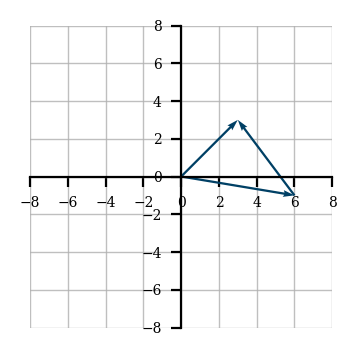

In [16]:
# Translating the two vectors to origin
u = np.array([5-(-1), 2-3])  
v = np.array([-2-1, 2-(-2)]) 
print("U = ", u)
print("V = ", v)

# calculate the resultant vector R
r = u + v
print("R = ", r)

# calculating magnitude of R from its components using L2 norm
mag = numpy.linalg.norm([r[0], r[1]], ord=2)
mag = (r[0]**2 + r[1]**2)**(1/2)
print("|R| = ", mag)

# calculating angle of resultant vector R
theta_rad = math.atan(r[1]/r[0])      # acos, asin, and atan take a ratio as input and return an angle in radians
theta_deg = theta_rad*(180/math.pi)   # so we need to convert it into degrees
# Since, both x and y coordinates are positive, that means the angle exists in the first quadrant
# So no need to add anything
theta_deg = theta_deg + 0
print("Counter-Clockwise angle in degrees from positive x-axis: ", theta_deg)

vectors = [u, v, r]
tails   = [(0,0), u, (0,0)]
plot_vector(vectors, tails)

**Example 2:** Given two vectors, U = 10 m, Φ  = 30 degrees and  V = 20m, Φ  = 60 degrees, determine their sum. Then, calculate the magnitude and the angle of the resultant vector using the component method

Ux: 8.66 m
Uy: 5.00 m
Vx: 10.00 m
Vy: 17.32 m
Resultant vector R:  [18.66025404 22.32050808]
|R| =  29.093129111764092
Counter-Clockwise angle in degrees from positive x-axis:  50.103909361017095


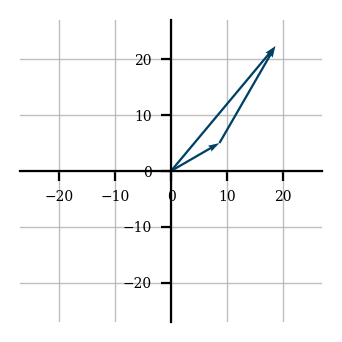

In [17]:
import numpy as np
import math as m
# calculating x and y components of vector U
ux = 10*math.cos(30*math.pi/180)       # sin, cos and tan take input angle in radians and return the ratio. 
uy = 10*math.sin(30*math.pi/180)       
print("Ux: %.2f" %ux, "m")
print("Uy: %.2f" %uy, "m")

# calculating x and y components of vector V
vx = 20*m.cos(60*math.pi/180)
vy = 20*m.sin(60*math.pi/180)
print("Vx: %.2f" %vx, "m")
print("Vy: %.2f" %vy, "m")

# calculate the sum of the two vectors R = U + V
rx = ux + vx
ry = uy + vy
r = np.array([rx, ry])
print("Resultant vector R: ", r)

# calculating magnitude of R from its components using L2 norm
mag = numpy.linalg.norm([rx, ry], ord=2)
mag = (rx**2 + ry**2)**(1/2)
print("|R| = ", mag)

# calculating angle of resultant vector R
theta_rad = math.atan(r[1]/r[0])    # acos, asin, and atan take a ratio as input and return an angle in radians
theta_deg = theta_rad*(180/math.pi)   # so we need to convert it into degrees
# Since, both the coordinates are positive, that means the angle exists in the first quadrant
# So the angle is already computed from positive x-axis
theta_deg = math.degrees(theta_rad)
theta_deg = theta_deg + 0
print("Counter-Clockwise angle in degrees from positive x-axis: ", theta_deg)

vectors = [(ux,uy), (vx,vy), (rx,ry)]
tails   = [(0,0), (ux,uy), (0,0)]
plot_vector(vectors, tails)

<img align="right" width="300" height="300"  src="images/LA/mul1.png"  >

### b. Multiplying a Vector with a Scalar Value (Scaling)
- Multiplication by a scalar is a way of changing the magnitude and/or direction of a vector. 
- The multiplication of a scalar value with a vector A will yield another vector.


- **Example 1:** Given the vector a = (-4, -6). If you multiply this vector by $-1/2$, its length (magnitude) halves and direction is reversed. 

$$
   \mathbf{-0.5a} = -0.5\left[ \begin{array}{c} -4 \\ -6  \end{array} \right] =
      \left[ \begin{array}{c} 2 \\ 3  \end{array} \right]
$$


Vector A:  [-4 -6]
|A| =  7.211102550927978
Counter-Clockwise angle in degrees from positive x-axis:  236.30993247402023

Vector B:  [2. 3.]
|-A| =  3.605551275463989
Counter-Clockwise angle in degrees from positive x-axis:  56.309932474020215


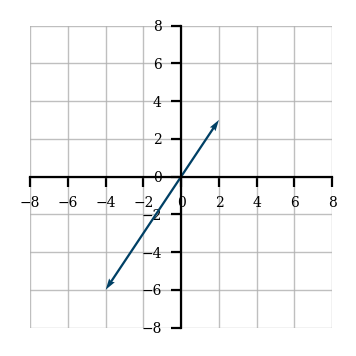

In [18]:
a = np.array([-4, -6])
print ("Vector A: ", a)
mag = numpy.linalg.norm(a, ord=2) # calculate magnitude using L2 norm
print("|A| = ",mag)
# calculating angle of vector A
theta_rad = math.atan(a[1]/a[0])  
theta_deg = theta_rad*(180/math.pi)
# Since, both the coordinates are negative, that means, the angle exists in the third quadrant
# Since, the angle is positive, that means, it is measured from negative x-axis in counter-clockwise direction
# So we have to add 180 degree to get the angle from positive x-axis in counter-clockwise direction
theta_deg = theta_deg + 180
print("Counter-Clockwise angle in degrees from positive x-axis: ", theta_deg)

# Multiplying the vector A  by -0.5 will give a new vector B
b = a * -0.5
print ("\nVector B: ", b)
# To calculate magnitude using L2 norm
mag = numpy.linalg.norm(b, ord=2)
mag = (b[0]**2 + b[1]**2) **(1/2)
print("|-A| = ",mag)

# calculating angle of vector B
theta_rad = m.atan(b[1]/b[0])    
theta_deg = theta_rad*(180/m.pi) 
# Since, both the coordinates are positive, that means, the angle exists in the first quadrant
# Since, the angle is positive, that means, it is measured from negative x-axis in counter-clockwise direction
# So need not to add anything
theta_deg = theta_deg + 0
print("Counter-Clockwise angle in degrees from positive x-axis: ", theta_deg)

vectors = [a, b]
plot_vector(vectors)

**Example 2:** Given the vector a = (1, 1). If you multiply this vector by $3$, its length (magnitude) is trippled and direction remains the same.

$$
   \mathbf{3a} = 3\left[ \begin{array}{c} 1 \\ 1  \end{array} \right] =
      \left[ \begin{array}{c} 3 \\ 3  \end{array} \right]
$$


Vector A:  [1 1]
|A| =  1.4142135623730951
Counter-Clockwise angle in degrees from positive x-axis:  45.0

Vector B:  [3 3]
|-A| =  4.242640687119285
Counter-Clockwise angle in degrees from positive x-axis:  45.0


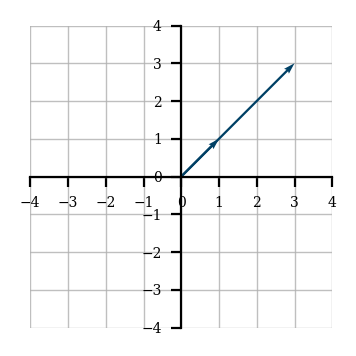

In [19]:
# Given vector A
a = np.array([1, 1])
print ("Vector A: ", a)
# calculate magnitude using L2 norm
mag = numpy.linalg.norm(a, ord=2)
mag = (a[0]**2 + a[1]**2) **(1/2)
print("|A| = ",mag)
# calculating angle of vector A
theta_rad = math.atan(a[1]/a[0])    # acos, asin, and atan take a ratio as input and return an angle in radians
theta_deg = theta_rad*(180/math.pi)   # so we need to convert it into degrees
# Since, both the coordinates are positive, that means, the angle exists in the first quadrant
# So we need not to add anything
theta_deg = theta_deg + 0
print("Counter-Clockwise angle in degrees from positive x-axis: ", theta_deg)



# Multiplying the vector A  by 3 will give a new vector
b = a * 3
print ("\nVector B: ", b)
# To calculate magnitude using L2 norm
mag = numpy.linalg.norm(b, ord=2)
mag = (b[0]**2 + b[1]**2) **(1/2)
print("|-A| = ",mag)

# calculating angle of vector B
theta_rad = m.atan(b[1]/b[0])    # acos, asin, and atan take a ratio as input and return an angle in radians
theta_deg = theta_rad*(180/m.pi)   # so we need to convert it into degrees
# Since, both the coordinates are positive, that means, the angle exists in the first quadrant
# So we need not to add anything
theta_deg = theta_deg + 0
print("Counter-Clockwise angle in degrees from positive x-axis: ", theta_deg)

vectors = [a, b]
plot_vector(vectors)

## 6.  Unit Vectors and Unit Basis Vectors

### a. Unit Vector
- Every vector $\overrightarrow{\rm v}$ in $\mathbb{R}^2$, $\mathbb{R}^3$,..., $\mathbb{R}^n$ will have a corresponding unit vector, which points in exactly the same direction as  $\overrightarrow{\rm v}$, but has a magnitude of one.
- A unit vector of a vector $\overrightarrow{\rm v}$ is represented as $\hat{\rm v}$ and can be calculated as:
$$\hat{\rm v} = \frac{\overrightarrow{\rm v}}{|\rm v|}$$

**Example 1:**  Find the unit vector of $\overrightarrow{\rm v} =\begin{bmatrix} 3 \\2 \end{bmatrix}$

$$\hat{\rm v_1} = \frac{1}{3.6}\begin{bmatrix} 3 \\2 \end{bmatrix}=\begin{bmatrix} 0.832 \\0.554 \end{bmatrix}$$

vector v =  [3 2]  magnitude = 3.605551275463989
Unit vector of v =  (0.8320502943378437, 0.5547001962252291)  magnitude = 1.0


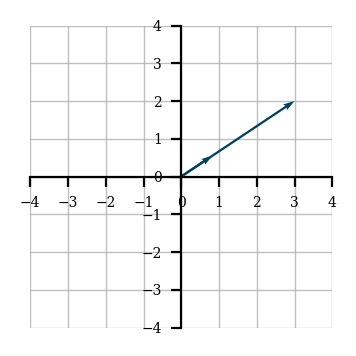

In [20]:
v = np.array((3,2))
mag_v = numpy.linalg.norm(v, ord=2)

vhat = (v[0]/mag_v, v[1]/mag_v)
mag_vhat = numpy.linalg.norm(vhat,ord=2)

print("vector v = ", v, " magnitude =", mag_v)
print("Unit vector of v = ", vhat, " magnitude =", mag_vhat)

vectors = [v, vhat]
plot_vector(vectors)

> Note: The unit vector $\overrightarrow{\rm u}$ of the given vector $\overrightarrow{\rm v} =(3,2)$ is one unit long, and sits right on top of $\overrightarrow{\rm v}$, pointing in the same direction as $\overrightarrow{\rm v}$. 

> The smaller triangle formed by the unit vector $\overrightarrow{\rm u}$ is similar to the larger triangle formed by the vector $\overrightarrow{\rm v}$


**Example 2:**  Find the unit vector of $\overrightarrow{\rm v} =\begin{bmatrix} 12 \\3 \\-4 \end{bmatrix}$

$$\hat{\rm v_1} = \frac{1}{13}\begin{bmatrix} 12 \\3\\-4 \end{bmatrix}=\begin{bmatrix} 0.92 \\0.23 \\-0.3\end{bmatrix}$$

In [21]:
v = np.array((12, 3, -4))
mag_v = numpy.linalg.norm(v, ord=2)

vhat = (v[0]/mag_v, v[1]/mag_v, v[2]/mag_v)
mag_vhat = numpy.linalg.norm(vhat,ord=2)

print("vector v = ", v, " magnitude =", mag_v)
print("Unit vector of v = ", vhat, " magnitude =", mag_vhat)

vector v =  [12  3 -4]  magnitude = 13.0
Unit vector of v =  (0.9230769230769231, 0.23076923076923078, -0.3076923076923077)  magnitude = 1.0


### b. Basis Vectors
- Basis vectors are special unit vectors pointing along the x, y or the z-axis.
- In two-dimensional space $\mathbb{R}2$, we define two specific basis vectors, $\hat{i} = (1,0)$ and $\hat{j} = (0,1)$ and in three-dimensional space $\mathbb{R}3$, we define three specific basis vectors $\hat{i} = (1,0,0)$, $\hat{j} = (0,1,0)$, and $\hat{k} = (0,0,1)$.
- A vector can be represented as a linear combination of its basis vectors.
- Let me express the vector $\overrightarrow{\rm v}$  in two-dimensional space $\mathbb{R}2$ as its basis vectors:
<h4 align="center"> $\overrightarrow{\rm v} \quad=\quad(6,4)\quad=\quad 6\hat{i} + 4\hat{j}\quad=\quad6 \left[ \begin{array}{c} 1 \\ 0  \end{array} \right] +    4 \left[ \begin{array}{c} 0 \\ 1  \end{array} \right] $ </h4>


- Let me express the vector $\overrightarrow{\rm v}$  in three-dimensional space $\mathbb{R}3$ as its basis vectors:
<h4 align="center"> $\overrightarrow{\rm v} \quad=\quad(-3,2,-1)\quad=\quad -3\hat{i} + 2\hat{j} - \hat{k}\quad=\quad -3 \left[ \begin{array}{c} 1 \\ 0 \\0  \end{array} \right] +    2 \left[ \begin{array}{c} 0 \\ 1 \\ 0  \end{array} \right] -    \left[ \begin{array}{c} 0 \\ 0 \\ 0  \end{array} \right]  $ </h4>

**Example 1:**  Write down the vector $\overrightarrow{\rm v} =(3,2)$, as linear combination of its unit vectors and visualize.

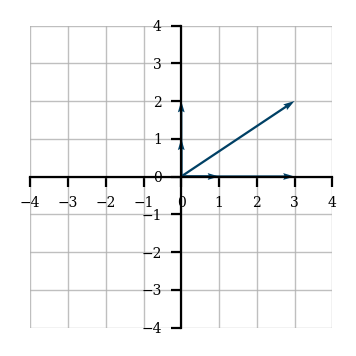

In [22]:
# create two basis vectors
i = numpy.array((1,0))
j = numpy.array((0,1))

# create a new vector, that is a scaled version of these two basis vectors
vec = 3*i + 2*j
vectors = [i, j, 3*i, 2*j, vec]
plot_vector(vectors)

### c. Linear combination and Span
- Linear combination is adding together two scaled vectors.
- Span is the set of all possible linear combinations, that we can create from two vectors.
- Using the basis vectors for example in $\mathbb{R}2$, we can actually build every vector in two-dimensional space, simply by adding scaled combinations of $\hat{i}$ and $\hat{j}$. 
- A span just describes the space reachable by linear combinations of some given vectors.

**Example 1:**  Generate hundred random vectors from linear combinations of basis vectors, $ \hat{i}=(1,0)$ and $\hat{j}=(0,1)$. The scalar multiples $m$ and $n$ range from random values $-8$ to $+8$.

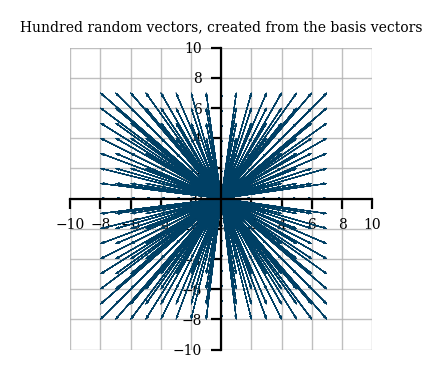

In [25]:
from numpy.random import randint
i = numpy.array((1,0))
j = numpy.array((0,1))

vectors = []
for _ in range(10000):
    m = randint(-8,8)
    n = randint(-8,8)
    vectors.append(m*i + n*j)
    
plot_vector(vectors)
pyplot.title("Hundred random vectors, created from the basis vectors");

> You can imagine that we can fill up the whole plane with infinite linear combinations, eventually filling up the entire 2D plane. **Indeed, the *span* of the basis vectors is the whole 2D space.**
> Remember, we are not forced to use the unit vectors  $\mathbf{i}$ and $\mathbf{j}$ as our basis vectors: other pairs of vectors could form a basis.

>- **Question:** Can we use another pair of vectors as basis and generates linear combinations?

**Example 2:**  Generate hundred random vectors from linear combinations of two vectors, $a=(-2,1)$ and $b=(1,-3)$. The scalar multiples $m$ and $n$ range from random values $-8$ to $+8$.

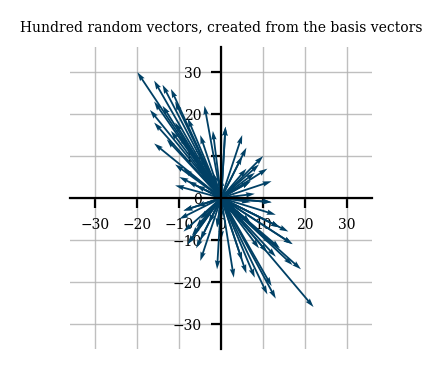

In [26]:
a = numpy.array((-2,1))
b = numpy.array((1,-3))

vectors = []
for _ in range(100):
    m = randint(-8,8)
    n = randint(-8,8)
    vectors.append(m*a + n*b)
    
plot_vector(vectors)
pyplot.title("Hundred random vectors, created from the basis vectors");

**Example 3:**  Generate fifty random vectors from linear combinations of two vectors, $ \hat{c}=(-2,-1)$ and $\hat{d}=(1,0.5)$. The scalar multiples $m$ and $n$ range from random values $-8$ to $+8$.

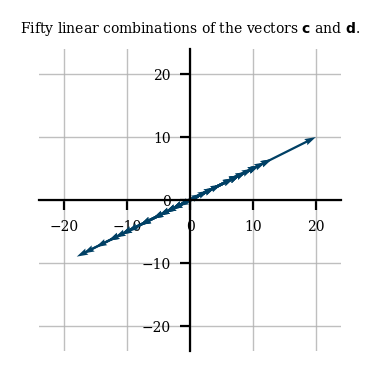

In [27]:
c = numpy.array((-2,-1))
d = numpy.array((1,0.5))
vectors = []
for _ in range(50):
    m = randint(-8,8)
    n = randint(-8,8)
    vectors.append(m*c + n*d)
    
plot_vector(vectors)
pyplot.title("Fifty linear combinations of the vectors $\mathbf{c}$ and $\mathbf{d}$.");

**What's going on?**

- The vector $\mathbf{d}$ is a scaled version of vector $\mathbf{c}$, so we say that the two vectors are colinear. 
- Thus, all linear combinations of $\mathbf{c}$ and $\mathbf{d}$ end up on one line, which is their span. Their combinations are not able to travel all over the plane!

## 8.  Vector to Vector Multiplication

### a. Dot Product
- The multiplication of vectors is conducted through dot product such that the two vectors (same size) being multiplied produce a scalar value.
- This is the most commonly used operation in machine learning.
- **Mathematically:**
    - The dot product of two vectors (when their components are known) is obtained by the summation of product of respective components:
$$u \cdot v = \sum_{i=1}^{n} u_i v_i$$

- **Geomatrically:**
    - The dot product of two vectors (when their magnitude and angle between the two vectors are known) is the product of the magnitude of the vectors and the cosine of the angle between them:

$$ 
\hspace{3.0cm} u.v \hspace{.3 cm}=\hspace{.3 cm} |u| \hspace{.3 cm} |v| \hspace{.3 cm} Cos \theta 
$$
    
 - The formula to compute the **angle between two vectors** using Dot Product is:

$$
\hspace{3.0cm} \theta \hspace{.3 cm}=\hspace{.3 cm} cos^{-1} \hspace{0.1 cm} \frac{u.v}{|u| |v|} 
$$

- The vector dot product is commutative in nature, i.e., $ u.v = v.u $ 
- The vector dot product can be to **determine orthogonality**, i.e., to check whether or not the two vectors are perpendicular to each other. If the vectors are perpendicular to each other then their dot product is zero
- The dot product is the key tool for calculating **vector projections** and **vector decompositions** as well
- The dot product is ubiquitous in deep learning: It is performed at every artificial neuron in a deep neural network, which may be made up of millions (or orders of magnitude more) of these neurons.

**Example 1:** Find the dot product of the two vectors A(2, 2, -1) and B(5, -3, 2), and also calculate the angle between them.
$\hspace{8 cm}u \cdot v = \sum_{i=1}^{n} u_i v_i\hspace{2 cm}$ OR $\hspace{2 cm}  u.v \hspace{.3 cm}=\hspace{.3 cm} |u| \hspace{.3 cm} |v| \hspace{.3 cm} Cos \theta $


$$ \theta \hspace{.3 cm}=\hspace{.3 cm} cos^{-1} \hspace{0.1 cm} \frac{u.v}{|u| |v|} $$


In [28]:
import math

In [29]:
a = np.array([2, 2, -1])
b = np.array([5, -3, 2])
print("a = ", a)
print("b = ", b)

#calculate magnitude of vector A and B
mag1 = numpy.linalg.norm(a, ord=2)
mag2 = numpy.linalg.norm(b, ord=2)
print("|a| = ", mag1)
print("|b| = ", mag2)

# Calculate Dot Product mathematically
ab = np.dot(a,b)
ab = a[0]*b[0] + a[1]*b[1]+a[2]*b[2]
print("\na.dot(b) = ", ab)


theta_rad = math.acos(ab/(mag1*mag2))
theta_deg = theta_rad*(180/math.pi)  
print("Angle: ", theta_deg)


# Calculate Dot Product geometrically
print("a.b = |a| |b| cos(𝜃) = ", mag1*mag2*math.cos(theta_rad))

a =  [ 2  2 -1]
b =  [ 5 -3  2]
|a| =  3.0
|b| =  6.164414002968976

a.dot(b) =  2
Angle:  83.79145537381414
a.b = |a| |b| cos(𝜃) =  2.0000000000000027


**Example 2:** Find out the angle between the given two vectors using dot product: <br>
$a = 2i + 2j + 3k$<br>
$b = 6i + 3j + 1k$


$\hspace{8 cm}u \cdot v = \sum_{i=1}^{n} u_i v_i\hspace{2 cm}$ OR $\hspace{2 cm}  u.v \hspace{.3 cm}=\hspace{.3 cm} |u| \hspace{.3 cm} |v| \hspace{.3 cm} Cos \theta $


$$ \theta \hspace{.3 cm}=\hspace{.3 cm} cos^{-1} \hspace{0.1 cm} \frac{u.v}{|u| |v|} $$

In [30]:
a = np.array([2, 2, 3])
b = np.array([6, 3, 1])

# printing original vectors
print("a = ", a)
print("b = ", b)

#calculate magnitude of vector A and B
mag1 = numpy.linalg.norm(a, ord=2)
mag2 = numpy.linalg.norm(b, ord=2)
print("|a| = ", mag1)
print("|b| = ", mag2)

# Calculate Dot Product mathematically
ab = np.dot(a,b)
ab = a[0]*b[0] + a[1]*b[1]+a[2]*b[2]
print("\na.dot(b) = ", ab)


theta_rad = math.acos(ab/(mag1*mag2))
theta_deg = theta_rad*(180/math.pi)  
print("Angle: ", theta_deg)


# Calculate Dot Product geometrically
print("a.b = |a| |b| cos(𝜃) = ", mag1*mag2*math.cos(theta_rad))

a =  [2 2 3]
b =  [6 3 1]
|a| =  4.123105625617661
|b| =  6.782329983125268

a.dot(b) =  21
Angle:  41.32652841215388
a.b = |a| |b| cos(𝜃) =  21.0


### b. Vector Cross Product
<img align="right" width="200" height="200"  src="images/cross-product.png"  >

- Unlike dot product, the cross product of two vectors produce a new vector and the direction of the resultant vector is given by the right-hand rule.

- **Mathematically:**
    - The cross product of two vectors (when their components are known) is obtained by using the determinant of the matrix as given below:

$$
\vec{a}\times\vec{b} = \begin{pmatrix}
      \hat{i} & \hat{j} & \hat{k}\\ 
       a_1      &   a_2     &  a_3 \\ 
       b_1      &   b_2    &  b_3
   \end{pmatrix}
$$

$$
\vec{a}\times\vec{b} = (a_2b_3 - b_2a_3)\hat{i} - (a_1b_3 - b_1a_3)\hat{j} +(a_1b_2 - b_1a_2)\hat{k} 
$$

- **Geomatrically:**
    - The cross product of two vectors (when their magnitude and angle between the two vectors are known) is the product of the magnitude of the vectors and the sine of the angle between them:

$$\hspace{3 cm} \vec{a} \times \vec{b} \hspace{.3 cm}=\hspace{.3 cm} |a| \hspace{.3 cm} |b| \hspace{.3 cm} sin (\theta) \hspace{.3 cm} \hat{n}$$

- Where $\hat{n}$ is the unit vector perpendicular to the plane containing the given two vectors, in the direction given by the right-hand rule.

- The formula to compute the **angle between two vectors** using Cross Product is:

$$ \theta \hspace{.3 cm}=\hspace{.3 cm} sin^{-1} \hspace{0.1 cm} \frac{|\vec{a}\times\vec{b}|}{|a| |b|} 
$$


- **Properties:**
    - The cross product is zero in length when vectors  A and B point in the same, or opposite, direction.
    - The cross product is maximum in length when vectors A and B are at right angles.
    - The vector cross product is NOT commutative in nature, i.e., $ a$ x $b \neq b$ x $a $ 

**Example 1:** Find the cross product of two vectors A(3,5,-7) and B(2,-6,4). Later prove that the resultant vector is perpendicular to both A and B.

$$
\vec{a}\times\vec{b} = \begin{pmatrix}
      \hat{i} & \hat{j} & \hat{k}\\ 
       3      &   5     &  -7 \\ 
       2      &   -6    &  4
   \end{pmatrix}
$$

$$
= (20-42)\hat{i} - (12+14)\hat{j} +(-18-10)\hat{k} 
$$
$$
= -22\hat{i}-26\hat{j}-28\hat{k}
$$ 

In [31]:
a = np.array([3, 5, -7])   
b = np.array([2, -6, 4])   

# printing original vectors
print("a = ", a)
print("b = ", b)

# Calculate Cross Product mathematically
ab = np.cross(a,b)
print("a x b = ", ab)


#calculate magnitude of vector a and b
mag1 = numpy.linalg.norm(a, ord=2)
mag2 = numpy.linalg.norm(b, ord=2)
mag3 = numpy.linalg.norm(ab, ord=2)
print("\n|a| = ", mag1)
print("|b| = ", mag2)
print("|axb| = ", mag2)

# Calculate the angle between two vectors
mag3 = numpy.linalg.norm(ab, ord=2)
theta_rad = math.asin(mag3/(mag1*mag2))
theta_deg = math.degrees(theta_rad) #theta_rad*(180/m.pi)  
print("Angle: ", theta_deg)

a =  [ 3  5 -7]
b =  [ 2 -6  4]
a x b =  [-22 -26 -28]

|a| =  9.1104335791443
|b| =  7.483314773547883
|axb| =  7.483314773547883
Angle:  40.29462137837708


<img align="right" width="300" height="300"  src="images/LA/normal-vector.jpg"  >

### c. Orthogonal  and Orthonormal Vectors: 
**Orthogonal Vector:**
- A normal vector is a vector that makes an angle of 90° with another surface, vector, or axis.
- Two vectors are said to be orthogonal, if their dot product is equal to zero.

$\hspace{3 cm}\vec{a}.\vec{b} \hspace{.3 cm}=\hspace{.3 cm} |a| \hspace{.1 cm} |b| \hspace{.3 cm} cos(90) = 0$


- Two vectors are said to be orthogonal, if their cross product is equal to $|a| \hspace{.1 cm} |b|$.

$\hspace{3 cm} \vec{a}$ x $\vec{b} \hspace{.3 cm}=\hspace{.3 cm} |a| \hspace{.1 cm} |b| \hspace{.3 cm} sin (90) \hspace{.3 cm} =  |a| \hspace{.1 cm} |b|$


**Orthonormal Vector:**
- Orthonormal vectors are special type of orthogonal vectors having a magnitude of one.
- So basis vectors are an example of orthonormal vector.

**Example 1:** Determine if  the two vectors A(6, -2, -1) and B(2, 5, 2) are perpendicular to eachother. (If the vectors are perpendicular to each other then their dot product is zero)
$$
u \cdot v = \sum_{i=1}^{n} u_i v_i
$$

In [32]:
a = np.array([6, -2, -1])
b = np.array([2, 5, 2])

# printing original vectors
print("a = ", a)
print("b = ", b)

# Calculating Dot Product of Two Vectors
ab = a.dot(b)
ab = a[0]*b[0] + a[1]*b[1]+a[2]*b[2]
print("a.b = ", ab)


mag1 = numpy.linalg.norm(a, ord=2)
mag2 = numpy.linalg.norm(b, ord=2)
theta_rad = math.acos(ab/(mag1*mag2))
theta_deg = math.degrees(theta_rad) #theta_rad*(180/m.pi)  
print("Angle: ", theta_deg)


lhs = mag1*mag2*math.sin(90*(math.pi/180))
rhs = mag1*mag2
print ("|a| |b| sin(90) = ", lhs)
print ("|a| |b| = ", rhs)
        

a =  [ 6 -2 -1]
b =  [2 5 2]
a.b =  0
Angle:  90.0
|a| |b| sin(90) =  36.78314831549904
|a| |b| =  36.78314831549904


# <span style='background :lightgreen' > Section II: (Overview of Linear Alagebra: Matrices) </span>
<h2 align="center">"Unfortunately, no one can be told what the Matrix is. You have to see it for yourself."</h2>
<h4 align="right">-Morpheus-</h4>

In [33]:
import numpy as np
import numpy.linalg
import math
import scipy
from matplotlib import pyplot as plt
from plot_helper import * # Helper functions: plot_vector, plot_linear_transformation, plot_linear_transformations

## 1. Overview of Matrices
- A matrix is a **two-dimensional array** of scalar values with one or more columns and one or more rows. They are also known as arrays.
- The numbers, variables, or expressions inside the matrix are called the entries or elements of a matrix.
$$
A_{m,n} = 
\begin{pmatrix}
a_{1,1} & a_{1,2} & a_{1,3}& \cdots & a_{1,n} \\
a_{2,1} & a_{2,2} & a_{2,3}& \cdots & a_{2,n} \\
a_{3,1} & a_{3,2} & a_{3,3}&\cdots & a_{3,n} \\
\vdots  & \vdots  & \ddots & \vdots  \\
a_{m,1} & a_{m,2} & a_{m,3}& \cdots & a_{m,n} 
\end{pmatrix}
$$


- The notation for a matrix is often an uppercase letter, such as **A**, and dimensions of a matrix is denoted as `m × n` for the number of rows and the number of columns respectively. 
- The elements of a matrix are referred to by the row and the column subscript, such as **a<sub>i</sub>,<sub>j</sub>**. 
- Matrices are a foundational element of linear algebra. Matrices are used throughout the field of machine learning in the description of **algorithms** and **processes** such as the input data variable (X) when training an algorithm. 

## 2. Matrices and its Types

**Example:** Defining a 3x3 matrix using NumPy, $A =$ 
$\begin{bmatrix} 
       -2 & 1 & 3\\ 
       1 & -3 & 5\\
       -3 & 2 & 1
 \end{bmatrix} $  

In [34]:
A = np.array([[-2, 1, 3], [1, -3, 2], [-3, 2, 1]])
print("Matrix A = \n", A)

print("A.ndim: ", A.ndim)   
print("A.shape: ", A.shape) 
print("A.size: ", A.size)   

Matrix A = 
 [[-2  1  3]
 [ 1 -3  2]
 [-3  2  1]]
A.ndim:  2
A.shape:  (3, 3)
A.size:  9


### a. Row Vector
- A row vector is a matrix with exactly one row and one or many columns.
- A row vector with one row and n columns is shown below:

$\begin{bmatrix} 
       b_1 & b_2 & b_3 & \cdots & b_n\\ 
 \end{bmatrix} $  
 
- Let us create a row vector having one row and three columns

In [35]:
B = np.array([-2, 1, 3])
print("Matrix B = \n", B)
print("A.ndim: ", B.ndim)   
print("A.shape: ", B.shape) 

# Taking the transpose of a matrix means to interchange the rows with columns. 
# The rows become columns and the columns become rows.
Bt = B.T
print("\nTranspose of Matrix B = \n", Bt)
print("A.ndim: ", Bt.ndim)   
print("A.shape: ", Bt.shape) 


Matrix B = 
 [-2  1  3]
A.ndim:  1
A.shape:  (3,)

Transpose of Matrix B = 
 [-2  1  3]
A.ndim:  1
A.shape:  (3,)


### b. Column Vector
- A column vector is a matrix with exactly one column and one or many rows.
- A column vector with one column and n rows is shown below:

$\begin{bmatrix} 
       b_1 \\ b_2 \\ b_3 \\ \vdots \\ b_n\\ 
 \end{bmatrix} $  
 
- Let us create a column vector having one column and three rows

In [36]:
B = np.array([[-2], [1], [3]])
print("Matrix B = \n", B)
print("A.ndim: ", B.ndim)   
print("A.shape: ", B.shape) 

# Taking the transpose of a matrix means to interchange the rows with columns. 
# The rows become columns and the columns become rows.
Bt = B.T
print("\nTranspose of Matrix B = \n", Bt)
print("A.ndim: ", Bt.ndim)   
print("A.shape: ", Bt.shape) 


Matrix B = 
 [[-2]
 [ 1]
 [ 3]]
A.ndim:  2
A.shape:  (3, 1)

Transpose of Matrix B = 
 [[-2  1  3]]
A.ndim:  2
A.shape:  (1, 3)


### c. Zero Matrix
- A matrix having all its elements as zero is a zero matrix $A =$ 
$\begin{bmatrix} 
       0 & 0 & 0\\ 
       0 & 0 & 0
 \end{bmatrix} $  
 
- We can create a zero matrix using the `numpy.zeros()` method as shown below:

In [37]:
A = np.zeros((2,3), dtype=np.int16)
print("Matrix A = \n", A)

Matrix A = 
 [[0 0 0]
 [0 0 0]]


### d. Ones Matrix
- A matrix having all its elements as ones is a ones matrix $A =$ 
$\begin{bmatrix} 
       1 & 1\\ 
       1 & 1\\
       1 & 1
 \end{bmatrix} $  
 
- We can create a ones matrix using the `numpy.ones()` method as shown below:

In [38]:
A = np.ones((2, 3), dtype=int)
print("Matrix A = \n", A)

Matrix A = 
 [[1 1 1]
 [1 1 1]]


### e. Random Integer Matrix
- To create a Matrix of any size, with random values of low inclusive and high exclusive and size size, we can use the  numpy.random.randint(low, high, size) method.

In [49]:
A = np.random.randint(0, 10, size =(5, 3))
print ("Matrix A = \n", A)

Matrix A = 
 [[2 2 3]
 [0 2 4]
 [1 1 6]
 [7 0 3]
 [1 3 4]]


### f. Square Matrix
- An `n × n` matrix is said to be a square matrix of order `n`. 
- In simple words, when the number of rows and the number of columns in the matrix are equal then the matrix is called square matrix.

$A =$ 
$\begin{bmatrix} 
       6 & 3 & 8\\ 
       2 & 1 & 9\\
       8 & 2 & 7
 \end{bmatrix} $  

In [55]:
A = np.random.randint(1, 10, size =(3, 3))
np.random.seed(54)
print ("Matrix A = \n", A)

Matrix A = 
 [[6 3 8]
 [2 1 9]
 [8 2 7]]


### g. Symmetric Matrix
- A symmetric matrix is a type of square matrix where the `top-right triangle` is the same as the `bottom-left` triangle.
- Matrix A is a   3 × 3 symmetric matrix: 
$A =$ 
$\begin{bmatrix} 
       4 & 1 & 7\\ 
       1 & -3 & 5\\
       7 & 5 & 2
 \end{bmatrix} $  


- In the above 3 × 3 square matrix A the diagonal 4, -3, 2 is the principal diagonal and 4, -3 and 2 are said to be the diagonal elements.
-  The transpose of a symmetric matrix is the matrix itself. $A = A^T$

In [56]:
A = np.array([[4, 1, 7], [1, -3, 5], [7, 5, 2]])
print("Matrix A = \n", A)

# taking transpose of the matrix
print('\nTranspose of A = \n', A.T)
np.transpose(A)

Matrix A = 
 [[ 4  1  7]
 [ 1 -3  5]
 [ 7  5  2]]

Transpose of A = 
 [[ 4  1  7]
 [ 1 -3  5]
 [ 7  5  2]]


array([[ 4,  1,  7],
       [ 1, -3,  5],
       [ 7,  5,  2]])

In [57]:
A.T

array([[ 4,  1,  7],
       [ 1, -3,  5],
       [ 7,  5,  2]])

### h. Triangular Matrix
- Given a matrix A, having `m` rows and `n` columns. 
$$
A_{m,n} = 
\begin{pmatrix}
a_{1,1} & a_{1,2} & a_{1,3}& \cdots & a_{1,n} \\
a_{2,1} & a_{2,2} & a_{2,3}& \cdots & a_{2,n} \\
a_{3,1} & a_{3,2} & a_{3,3}&\cdots & a_{3,n} \\
\vdots  & \vdots  & \ddots & \vdots  \\
a_{m,1} & a_{m,2} & a_{m,3}& \cdots & a_{m,n} 
\end{pmatrix}
$$
 
- The `Upper triangular matrix` of matrix $A$ has values only above the main diagonal, while the remaining elements are filled with zeros. <br>

$\begin{pmatrix}
a_{1,1} & a_{1,2} & a_{1,3}& \cdots & a_{1,n} \\
0 & a_{2,2} & a_{2,3}& \cdots & a_{2,n} \\
0 & 0 & a_{3,3}&\cdots & a_{3,n} \\
\vdots  & \vdots  & \ddots & \vdots  \\
0 & 0 & 0& \cdots & a_{m,n} 
\end{pmatrix}
$

- The `Lower triangular matrix` of matrix $A$ has values only below the main diagonal, while the remaining elements are filled with zeros. <br>
$
\begin{pmatrix}
a_{1,1} & 0 & 0& \cdots & 0 \\
a_{2,1} & a_{2,2} & 0& \cdots & 0 \\
a_{3,1} & a_{3,2} & a_{3,3}&\cdots & 0 \\
\vdots  & \vdots  & \ddots & \vdots  \\
a_{m,1} & a_{m,2} & a_{m,3}& \cdots & a_{m,n} 
\end{pmatrix}
$

In [58]:
A = np.array([[6, 3, 8, 5], [2, 1, 9, 7], [8, 2, 4, 7], [3, 1, 5, 8]])
print("Matrix A: \n", A)

# Lower triangular matrix of matrix A
lower = np.tril(A)
print("Lower Triangular Matrix of A:\n", lower)

# Upper triangular matrix of matrix A
upper = np.triu(A)
print("Upper Triangular Matrix of A: \n", upper)

Matrix A: 
 [[6 3 8 5]
 [2 1 9 7]
 [8 2 4 7]
 [3 1 5 8]]
Lower Triangular Matrix of A:
 [[6 0 0 0]
 [2 1 0 0]
 [8 2 4 0]
 [3 1 5 8]]
Upper Triangular Matrix of A: 
 [[6 3 8 5]
 [0 1 9 7]
 [0 0 4 7]
 [0 0 0 8]]


### i. Diagonal Matrix
- A diagonal matrix is a square matrix in which all entries that are not on the main diagonal are zero.
- A diagonal matrix is a special square matrix that is BOTH upper and lower triangular since all elements, whether above or below the principal diagonal, are 0.
- A diagonal matrix is often denoted with the variable `D`

$$
A_{n,n} = 
\begin{pmatrix}
a_{1,1} & 0 & 0& \cdots & 0 \\
0 & a_{2,2} & 0&\cdots & 0 \\
0 & 0 & a_{3,3}&\cdots & 0 \\
\vdots  & \vdots  & \vdots & \ddots & \vdots  \\
0 & 0 & 0 & \cdots & a_{n,n} 
\end{pmatrix}
$$

- There are two ways to represent a diagonal matrix:
    - As a full matrix.
    - As a vector of values on the main diagonal. 
    
- NumPy provides the function `np.diag()` that can create a diagonal matrix from an existing matrix, or transform a vector into a diagonal matrix.

In [60]:
A = np.random.randint(1, 10, size =(4, 4))
print("Matrix A : \n", A)

# Extract a diagonal vector from a matrix
d = np.diag(A)
print("\nDiagonal Vector = ", d)

# create diagonal matrix from diognal vector
D = np.diag(d)
print("\nDiagonal Matrix : \n", D)

Matrix A : 
 [[7 9 8 4]
 [3 2 3 7]
 [9 2 8 8]
 [3 8 8 9]]

Diagonal Vector =  [7 2 8 9]

Diagonal Matrix : 
 [[7 0 0 0]
 [0 2 0 0]
 [0 0 8 0]
 [0 0 0 9]]


### j. Identity Matrix
- An identity matrix $I_n$, is a square matrix in which all the entries in the principal diagonal are 1 and all other elements are 0. 

$$I_2 =\begin{bmatrix} 
       1 & 0\\ 
       0 & 1
 \end{bmatrix} $$


$$I_3 =\begin{bmatrix} 
       1 & 0 & 0\\ 
       0 & 1 & 0\\
       0 & 0 & 1
 \end{bmatrix} $$  
 
- **Properties of Identity Matrix:**
    - A vector of length `n` remains unchanged when multiplied with $I_n$.
    - Multiplying a matrix or vector by its compatible identity matrix, will result the matrix itself. $AI = A$
    - Multiplying a matrix by its inverse will result in an identity matrix of the same order. $AA^{-1} = I$
    - The `trace` (sum of elements in principal diagonal) of an identity matrix is equal to identity matrix’s order.
    - The determinant of an identity matrix is always equal to 1.


- The `numpy.eye(rows, cols, k, dtype)` function is used to create an identigy matrix.
    - Where, default value of `k` is zero, means main diagonal,  a positive value refers to an upper diagonal, and a negative value refers to a lower diagonal.
    - Default `dtype` is float

In [61]:
I3 = np.eye(4, 4)
print("3x3 Identiy Matrix:\n", I3)

3x3 Identiy Matrix:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [62]:
I3 = np.eye(4, 4, 1,dtype=np.uint8)
print("3x3 Identiy Matrix:\n", I3)

3x3 Identiy Matrix:
 [[0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 0 0]]


In [63]:
I3 = np.eye(4, 4, -1,dtype=np.uint8)
print("3x3 Identiy Matrix:\n", I3)

3x3 Identiy Matrix:
 [[0 0 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]]


### k. Scalar Matrix
- A scalar matrix is a type of square matrix in which its principal diagonal elements are all equal  and off-diagonal elements are all 0. 
- It is a multiplicative constant of an identity matrix.
- Some examples of 2x2 scalar matrices are given below:<br><br>
$\begin{bmatrix} 
       2 & 0\\ 
       0 & 2
 \end{bmatrix}
\hspace{2 cm}\begin{bmatrix} 
       -3 & 0\\ 
       0 & -3
 \end{bmatrix} 
 \hspace{2 cm}\begin{bmatrix} 
       4 & 0\\ 
       0 & 4
 \end{bmatrix} $  
  


- Some examples of 3x3 scalar matrices are given below:<br><br>
$\begin{bmatrix} 
       4 & 0 & 0\\ 
       0 & 4 & 0\\
       0 & 0 & 4
 \end{bmatrix} 
\hspace{2 cm}\begin{bmatrix} 
       -3 & 0 & 0\\ 
       0 & -3 & 0\\
       0 & 0 & -3
 \end{bmatrix} 
 \hspace{2 cm}\begin{bmatrix} 
       2 & 0 & 0\\ 
       0 & 2 & 0\\
       0 & 0 & 2
 \end{bmatrix} $  

In [64]:
A = np.eye(3, 3, dtype=np.uint8)
print("Scalar Matrix A:\n", 2*A)
B = np.eye(4, 4, dtype=np.uint8)
print("Scalar Matrix B:\n", -3*B)

Scalar Matrix A:
 [[2 0 0]
 [0 2 0]
 [0 0 2]]
Scalar Matrix B:
 [[-3  0  0  0]
 [ 0 -3  0  0]
 [ 0  0 -3  0]
 [ 0  0  0 -3]]


### l. Orthogonal Matrix
- An **orthogonal/orthonormal matrix** is a type of square matrix whose column vectors and row vectors are orthonormal vectors, i.e., are mutually perpendicular and have magnitude equal to 1. 
- An Orthogonal matrix is often denoted as uppercase $Q_{n,n}$. 

$\hspace{3 cm} Q_{2,2} = \begin{bmatrix} 
       1 & 0\\ 
       0 & -1
 \end{bmatrix}$
$\hspace{3 cm}Q_{3,3} = \begin{bmatrix} 
       1 & 0 & 0\\ 
       0 & -1 & 0 \\
       0 & 0 & 1
\end{bmatrix}$



- **Properties:**
    - An orthogonal matrix is always a symmetric matrix, all identity matrices are hence orthogonal matrices.
    - The product of two orthogonal matrices will also be an orthogonal matrix.$\hspace{.5 cm} Q_1.Q_2 = Q_3$    
    - The transpose of the orthogonal matrix will also be an orthogonal matrix.$\hspace{.5 cm} Q_1^T = Q_2$    
    - When an Orthogonal matrix is multiplied with its transpose, it will return an identity matrix.$\hspace{.5 cm} Q.Q^T = Q^T.Q = I$
    - A matrix is orthogonal if its transpose is equal to its inverse.
    - The determinant of the orthogonal matrix will always be +1 or -1.
    - The eigenvalues of the orthogonal matrix will always be ±1
- Orthogonal matrices are mostly used a lot for `linear transformations`, such as `reflections` and `permutations`.

In [65]:
Q1 = np.array([ [1, 0, 0],[0, -1, 0], [0,0,1]])
Q2 = np.array([ [-1, 0, 0],[0, 1, 0], [0,0,1]])
print("Q1: \n", Q1)
print("Q2: \n", Q1)

# Product of two orthogonal matrices will also be an orthogonal matrix
print("\nQ1.Q2 = \n", np.dot(Q1,Q2))

# Transpose of the orthogonal matrix will also be an orthogonal matrix
print("\nQ1.T = \n", Q1.T)

# When an Orthogonal matrix is multiplied with its transpose, it will return an identity matrix
print("\nnp.dot(Q1, Q1.T) = \n", np.dot(Q1,(Q1.T)))

Q1: 
 [[ 1  0  0]
 [ 0 -1  0]
 [ 0  0  1]]
Q2: 
 [[ 1  0  0]
 [ 0 -1  0]
 [ 0  0  1]]

Q1.Q2 = 
 [[-1  0  0]
 [ 0 -1  0]
 [ 0  0  1]]

Q1.T = 
 [[ 1  0  0]
 [ 0 -1  0]
 [ 0  0  1]]

np.dot(Q1, Q1.T) = 
 [[1 0 0]
 [0 1 0]
 [0 0 1]]


## 2. Matrix Operations

### a. Matrix Addition
- Two matrices with the same order can be added together to create a third matrix of same order.
- It is element by element addition and can be performed in Python using the plus operator on two NumPy arrays as shown:
$$
C_{m,n} = A_{m,n} + B_{m,n}
$$

$$
C_{m,n} = A_{m,n} + B_{m,n}
$$

$$
C_{m,n} = 
\begin{pmatrix}
a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
\vdots  & \vdots  & \ddots & \vdots \\
a_{m,1} & a_{m,2} & \cdots & a_{m,n} 
\end{pmatrix} +
\begin{pmatrix}
b_{1,1} & b_{1,2} & \cdots & b_{1,n} \\
b_{2,1} & b_{2,2} & \cdots & b_{2,n} \\
\vdots  & \vdots   & \ddots  & \vdots\\
b_{m,1} & b_{m,2} & \cdots & b_{m,n} 
\end{pmatrix}
$$

$$
C_{m,n} = 
\begin{pmatrix}
a_{1,1}+b_{1,1} & a_{1,2}+b_{1,2} & \cdots & a_{1,n}+b_{1,n} \\
a_{2,1}+b_{2,1} & a_{2,2}+b_{2,2} & \cdots & a_{2,n}+b_{2,n} \\
\vdots  & \vdots  & \ddots & \vdots \\
a_{m,1}+b_{m,1} & a_{m,2}+b_{m,2} & \cdots & a_{m,n}+b_{m,n} 
\end{pmatrix}
$$

In [66]:
A = np.random.randint(-5, 6, size =(3, 3))
B = np.random.randint(-5, 6, size =(3, 3))
print("Matrix A : \n", A)
print("Matrix B : \n", B)

# adding two matrices
C = A + B
print("\nA + B = \n", C)

Matrix A : 
 [[-2 -2  0]
 [ 2  3 -2]
 [ 0  3 -4]]
Matrix B : 
 [[-2 -3 -3]
 [ 3 -3 -2]
 [ 4  4  4]]

A + B = 
 [[-4 -5 -3]
 [ 5  0 -4]
 [ 4  7  0]]


### b. Matrix-Scalar Multiplication
- A matrix can be multiplied by a scalar. This can be represented using the dot notation between the matrix and the scalar.
- The result is a matrix with the same size as the parent matrix where each element of the matrix is multiplied by the scalar value.


$$
C_{m,n} = b.A_{m,n}
$$

$$
C_{m,n} = 
b.\begin{pmatrix}
a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
\vdots  & \vdots  & \ddots & \vdots \\
a_{m,1} & a_{m,2} & \cdots & a_{m,n} 
\end{pmatrix}
$$

$$
C_{m,n} = 
\begin{pmatrix}
b.a_{1,1} & b.a_{1,2} & \cdots & b.a_{1,n} \\
b.a_{2,1} & b.a_{2,2} & \cdots & b.a_{2,n} \\
\vdots  & \vdots  & \ddots & \vdots \\
b.a_{m,1}& b.a_{m,2} & \cdots & b.a_{m,n} 
\end{pmatrix}
$$

In [67]:
A = np.random.randint(1, 6, size =(3, 3))
print("Matrix A : \n", A)

b = 2
C = b*A
print("\n b*A: \n", C)

Matrix A : 
 [[2 4 5]
 [5 4 5]
 [5 5 1]]

 b*A: 
 [[ 4  8 10]
 [10  8 10]
 [10 10  2]]


### c. Matrix Multiplication (Matrix Hadamard Product)
- Two matrices with the same size can be multiplied together, and this is often called `element-wise matrix multiplication` or the `Hadamard product`. 
- It is not the typical operation meant when referring to matrix multiplication, therefore a different operator is often used, which is a circle $\odot$.
- As with element-wise subtraction and addition, element-wise multiplication involves the multiplication of elements from each parent matrix to calculate the values in the new matrix.
- We can implement this in Python using the `asterik *` operator directly on the two NumPy arrays.


$$
C_{m,n} = A_{m,n}\odot B_{m,n}
$$

$$
C_{m,n} = 
\begin{pmatrix}
a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
\vdots  & \vdots  & \ddots & \vdots \\
a_{m,1} & a_{m,2} & \cdots & a_{m,n} 
\end{pmatrix} \odot
\begin{pmatrix}
b_{1,1} & b_{1,2} & \cdots & b_{1,n} \\
b_{2,1} & b_{2,2} & \cdots & b_{2,n} \\
\vdots  & \vdots   & \ddots  & \vdots\\
b_{m,1} & b_{m,2} & \cdots & b_{m,n} 
\end{pmatrix}
$$

$$
C_{m,n} = 
\begin{pmatrix}
a_{1,1}.b_{1,1} & a_{1,2}.b_{1,2} & \cdots & a_{1,n}.b_{1,n} \\
a_{2,1}.b_{2,1} & a_{2,2}.b_{2,2} & \cdots & a_{2,n}.b_{2,n} \\
\vdots  & \vdots  & \ddots & \vdots \\
a_{m,1}.b_{m,1} & a_{m,2}.b_{m,2} & \cdots & a_{m,n}.b_{m,n} 
\end{pmatrix}
$$

In [68]:
A = np.random.randint(1, 6, size =(2, 3))
B = np.random.randint(1, 6, size =(2, 3))
print("Matrix A : \n", A)
print("Matrix B : \n", B)

# Matrices Hadamard product
C = A * B
# printing product of two matrices
print("\n A * B = \n", C)


Matrix A : 
 [[4 4 4]
 [1 5 3]]
Matrix B : 
 [[1 2 5]
 [5 4 3]]

 A * B = 
 [[ 4  8 20]
 [ 5 20  9]]


### d. Matrix Multiplication (Matrix Dot Product)
- Matrix multiplication, also called the `matrix dot product` is more complicated than the previous operations and involves a rule as not all matrices can be multiplied together. 
- The rule for matrix multiplication is "the number of `columns` in the first matrix must equal the number of `rows` in the second matrix". The result is a new matrix with m rows and k columns.
- The intuition for the matrix multiplication is that we are calculating the dot product between each row in matrix A with each column in matrix B. 

$$
C_{m,k} = A_{m,n} @ B_{n,k}
$$

$$
C_{3,2} = A_{3,2} @ B_{2,2}
$$


$$
C_{3,2} = 
\begin{bmatrix}
a_{1,1} & a_{1,2} \\
a_{2,1} & a_{2,2} \\
a_{3,1} & a_{3,2} 
\end{bmatrix} @
\begin{bmatrix}
b_{1,1} & b_{1,2} \\
b_{2,1} & b_{2,2}
\end{bmatrix}
$$

$$
C_{3,2} = 
\begin{bmatrix}
a_{1,1}.b_{1,1}+a_{1,2}.b_{2,1} &\hspace{.7 cm} a_{1,1}.b_{1,2}+a_{1,2}.b_{2,2} \\
a_{2,1}.b_{1,1}+a_{2,2}.b_{2,1} &\hspace{.7 cm} a_{2,1}.b_{1,2}+a_{2,2}.b_{2,2} \\
a_{3,1}.b_{1,1}+a_{3,2}.b_{2,1} &\hspace{.7 cm} a_{3,1}.b_{1,2}+a_{3,2}.b_{2,2}
\end{bmatrix}
$$
- In Python, matrix multiplication operation can be performed the `numpy.dot()` function or using the `newer @ operator`, since Python version 3.5.


In [69]:
A = np.array([ [1, 2],[3, 4], [5, 6]])
B = np.array([ [1, 2],[3, 4]])
print("Matrix A = \n", A)
print("\nMatrix B = \n", B)


# multiply matrices using dot function
C = np.dot(A,B)
# print dot product matrix
print("\n A.dot(B) = \n", C)

# multiply matrices with @ operator
D = A @ B

# print dot product matrix
print("\nA @ B = \n", D)

Matrix A = 
 [[1 2]
 [3 4]
 [5 6]]

Matrix B = 
 [[1 2]
 [3 4]]

 A.dot(B) = 
 [[ 7 10]
 [15 22]
 [23 34]]

A @ B = 
 [[ 7 10]
 [15 22]
 [23 34]]


### e. Matrix-Vector Multiplication
- A matrix and a vector can be multiplied together as long as the rule of matrix multiplication is observed. Specifically, that the number of columns in the matrix must equal the number of items in the vector. 
- As with matrix multiplication, the operation can be written using the dot notation. 
- Because the vector only has one column, the result is always a **vector**.

$$
C_{n} = A_{m,n} @ V_{n}
$$

$$
C_{2} = A_{3,2} @ V_{2}
$$


$$
C_{2} = 
\begin{bmatrix}
a_{1,1} & a_{1,2} \\
a_{2,1} & a_{2,2} \\
a_{3,1} & a_{3,2} 
\end{bmatrix} @
\begin{bmatrix}
v_{1}  \\
v_{2}
\end{bmatrix}
$$

$$
C_{n} = 
\begin{bmatrix}
a_{1,1}.v_1+a_{1,2}.v_2  \\
a_{2,1}.v_1+a_{2,2}.v_2  \\
a_{3,1}.v_1+a_{3,2}.v_2 
\end{bmatrix}
$$
- In Python a matrix can be multiplied with a vector using the `numpy.dot()` function or using the `newer @ operator`, since Python version 3.5.


In [70]:
A = np.array([ [1, 2],[3, 4], [5, 6]])
v = np.array([2, 3])
print("Matrix A = \n", A)
print("\nMatrix v = \n", v)


C = A.dot(v)
print("\n A.dot(v) = \n", C)

D = A @ v

# print dot product matrix
print("\nA @ v = \n", D)

Matrix A = 
 [[1 2]
 [3 4]
 [5 6]]

Matrix v = 
 [2 3]

 A.dot(v) = 
 [ 8 18 28]

A @ v = 
 [ 8 18 28]


### f. Frobenius Norm
- We have already talked about Norms with respect to vectors and we saw how they are used to calculate their magnitude from origin.
- Similar to L<sup>2</sup> norm of a vector, the Frobenius norm of a matrix is calculated as the square root of the sum of the absolute squares of its elements.
- In simple words, Frobenius norm of a matrix is the sum of the magnitude of all vectors in a matrix.

<h3 align="center">      $\left\lVert  x \right\rVert_F$   $=$   $\sqrt{\sum_{i,j} x_{i,j}^2}$        </h3>

In [71]:
A = np.array([ [0, 2, 1],[2, 0, 0]])
print("Matrix A = \n", A)

f = np.linalg.norm(A, ord=None)
print("\n Frobenius Norm =", f)


Matrix A = 
 [[0 2 1]
 [2 0 0]]

 Frobenius Norm = 3.0


### g. Transpose of a Matrix
- A defined matrix can be transposed, which creates a new matrix with the number of `columns and rows flipped`. This is denoted by the superscript T next to the matrix A<sup>T</sup>.


$$
A_{m,n} = 
\begin{bmatrix}
a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
\vdots  & \vdots  & \ddots & \vdots \\
a_{m,1} & a_{m,2} & \cdots & a_{m,n} 
\end{bmatrix}  \hspace{3 cm}  {A^T}_{n,m} = 
\begin{bmatrix}
a_{1,1} & a_{2,1} & \cdots & a_{m,1} \\
a_{1,2} & a_{2,2} & \cdots & a_{m,2} \\
\vdots  & \vdots  & \ddots & \vdots \\
a_{1,n} & a_{2,n} & \cdots & a_{m,n} 
\end{bmatrix}
$$


$$
A_{3,2} = 
\begin{bmatrix}
1 & 2  \\
3 & 4 \\
5 & 6 
\end{bmatrix} \hspace{3 cm} {A^T}_{2,3} = 
\begin{bmatrix}
1 & 3 & 5 \\
2 & 4 & 6
\end{bmatrix}
$$

- The operation has no effect if the matrix is symmetrical, e.g. has the same number of columns and rows and the same values at the same locations on both sides of the invisible diagonal line (The columns of AT are the rows of A).

$$
A_{3,3} =\begin{bmatrix} 
       4 & 1 & 7\\ 
       1 & -3 & 5\\
       7 & 5 & 2
 \end{bmatrix}\hspace{3 cm} {A^T}_{3,3} = 
\begin{bmatrix}
4 & 1 & 7 \\
1 & -3 & 5 \\
7 & 5 & 2 
\end{bmatrix}
$$
 
 

- We can transpose a matrix in NumPy by calling the T attribute.

In [72]:
A = np.array([ [1, 2],
           [3, 4],
           [5, 6]])
print("Original Matrix A: \n", A)

# computing transpose of Matrix A using T attribute
C = A.T
C = np.transpose(A)
print("\nTranspose Matrix: \n", C)

Original Matrix A: 
 [[1 2]
 [3 4]
 [5 6]]

Transpose Matrix: 
 [[1 3 5]
 [2 4 6]]


### h. Determinant of a Matrix

- Matrix determinant can be thought of as a function whose input is a square matrix and output is a scalar value.
- The determinant of a matrrix is used to compute the inverse of a matrix.
- If the determinant of a matrix is zero, that means it is a singular matrix, is non-invertable and having linearly dependent columns.
- Moreover, determinant is used in solving linear equations and it also caputures the notions of how linear transformation change area or volume.
- The determinant also describes the way a matrix will scale another matrix when they are multiplied together. For example, if the determinant of a matrix is one, it preserves the space of other matrix.
- To calculate the determinant of a 2x2 matrix, we multiply the component `a` by the determinant of the “submatrix” formed by ignoring `a's` row and column. In this case, this submatrix is the 1×1 matrix consisting of `d`, and its determinant is just `d`. So the first term of the determinant is `ad`. Next, we proceed to the second component of the first row, which is the upper right component `b`. We multiply `b` by the determinant of the submatrix formed by ignoring `b's` row and column, which is `c`. So, the next term of the determinant is `bc`. The total determinant is simply the first term ad minus the second term. :<br>
$\hspace{2 cm}A = \begin{bmatrix} 
       a & b\\ 
       c & d
 \end{bmatrix} $  

$\hspace{2 cm}det(A) = |A| = ad - cb$

- Now that we know how to calculate determinant of a 2x2 matrix, we can generalize this technique to compute determinant of larger matrices using recursion.
- Let us calculate the determinant of a 3x3 matrix:<br>
$\hspace{2 cm}B =$ 
$\begin{bmatrix} 
       a & b & c\\ 
       d & e & f\\
       g & h & i
 \end{bmatrix} $  
 
$\hspace{2 cm}det(B) = |B| = a\begin{vmatrix} e & f\\h & i \end{vmatrix} - b\begin{vmatrix} d & f\\g & i \end{vmatrix} +c\begin{vmatrix} d & e\\g & h \end{vmatrix} = a(ef-hf) - b(di-gf) + c(dh-ge)$

- In NumPy, the determinant of a matrix can be calculated using the `det()` function.

In [73]:
A = np.array([[-3, 1],[6, -4]])
print("Matrix A: \n", A)
det1 = numpy.linalg.det(A)
print("det(A): ", det1)


B = np.array([[1, 2, 4],[2, -1, 3],[0, 5, 1]])
print("\nMatrix B: \n", B)
det2 = numpy.linalg.det(B)
print("det(B): ", det2)

Matrix A: 
 [[-3  1]
 [ 6 -4]]
det(A):  6.0

Matrix B: 
 [[ 1  2  4]
 [ 2 -1  3]
 [ 0  5  1]]
det(B):  19.999999999999996


In [74]:
A = np.array([[6, -3],[4, -2]])
print("Matrix A: \n", A)
det1 = numpy.linalg.det(A)
print("det(A): ", det1)

B = np.array([[1, 1, 1],[2, 3, 1],[0, -1, 1]])
print("\nMatrix B: \n", B)
det2 = numpy.linalg.det(B)
print("det(B): ", det2)

C = np.array([[2, 1, 2],[1, 0, 1],[4, 1, 4]])
print("\nMatrix C: \n", C)
det3 = numpy.linalg.det(C)
print("det(C): ", det3)

Matrix A: 
 [[ 6 -3]
 [ 4 -2]]
det(A):  0.0

Matrix B: 
 [[ 1  1  1]
 [ 2  3  1]
 [ 0 -1  1]]
det(B):  0.0

Matrix C: 
 [[2 1 2]
 [1 0 1]
 [4 1 4]]
det(C):  0.0


> Note the determinant of matrix A is zero, that means matrix A is not invertable. This can be observed that the two columns of matrix A are not independent, or we can say that the two columns of matrix A are dependent. So the first column is a multiple of the second column, i.e., you can multiply the second column by -2 to get the first column. So that means the matrix A represent two parallel lines and it is impossible to solve this matrix for unknowns.

### i. Inverse of a Matrix
- The way numbers has reciprocals, and when we multiply a number by its reciprocal we get a 1.
- Similarly a matrix can have an inverse, and when we multiply a matrix by its inverse, we get the identity matrix.
- The inverse of matrix is used of find the solution of linear equations through the matrix inversion method. 

$\hspace{2 cm}AA^{-1} = A^{-1}A = I_n$
- For a matrix to have an inverse, it has to satisfy two conditions:
    - The matrix needs to be a square matrix.
    - The determinant of the matrix must not be zero.
- Almost all of us know the shortcut way to calculate the Inverse of a 2x2 matrix. 
    - Interchange the main diagonal elements (`a` and `d`).
    - Negate the remaining two elements (`b` and `c`).
    - Devide the resulting matrix with the determinant of the original matrix.
:<br>
$\hspace{2 cm}A = \begin{bmatrix} 
       a & b\\ 
       c & d
 \end{bmatrix} $  


$\hspace{2 cm}A = \frac{1}{det(A)}\begin{bmatrix} 
       d & -b\\ 
       -c & a
 \end{bmatrix} $  


- Formal steps to compute the inverse of a matrix are:
    - Step 1: Find the `matrix of minors` for the given matrix.
    - Step 2: Turn that matrix into the `matrix of cofactors`.
    - Step 3: Find the adjugate or `adjoint of matrix`.
    - Step 4: Divide adjugate matrix by `determinant` of given matrix.

**Example:** Perform step by step calculations to calculate the Inverse of
$\hspace{1 cm}A_{3,3} = \begin{bmatrix} 3 & 0 & 2\\ 2 & 0 & -2\\0 & 1 & 1\end{bmatrix} $  

**Step 1:** Find the `matrix of minors` for the given matrix.
- For each element of the matrix:
    - Ignore the values on the current row and column
    - Calculate the determinant of the remaining values
- Put those determinants into a matrix and you get the `matrix of minors`, as shown below:
$$\begin{bmatrix} 2 & 2 & 2\\ -2 & 3 & 3\\0 & -10 & 0\end{bmatrix} $$ 



**Step 2:** Turn that matrix into the `matrix of cofactors`.
- Multiply each element of matrix of minors with alternate +1 and -1.
- Start from first row (left to right), then second row and so on.
$$\begin{bmatrix} 2 & -2 & 2\\ 2 & 3 & -3\\0 & 10 & 0\end{bmatrix} $$ 


**Step 3:** Find the adjugate or `adjoint of matrix`.
- Take transpose of matrix of cofactors and you get the adjugate or adjoint matrix as shown below:
$$\begin{bmatrix} 2 & 2 & 0\\ -2 & 3 & 10\\2 & -3 & 0\end{bmatrix} $$ 


**Step 4:** Divide adjugate matrix by `determinant` of given matrix.
- Find the determinant of given matrix, which is 10.
- Divide each element of adjugate matrix by 10 to get the inverse of matrix as shown below:
$$\begin{bmatrix} 1/5 & 1/5 & 0\\ -1/5 & 3/10 & 1\\1/5 & -3/10 & 0\end{bmatrix} $$ 


>- To rescue us from all this labour, Python gives us `numpy.linalg.inv()` method to compute the inverse of a non-singular matrix (a square matrix having non-zero dterminant)

In [75]:
A = np.array([ [3,0,2],[2,0,-2],[0,1,1]])
print("Matrix A: \n", A)
print("det(A): ", numpy.linalg.det(A))

AI = numpy.linalg.inv(A)
print("\nInverse of Matrix A: \n", AI)

# Verify
I = np.dot(A,AI)
print("\nnp.dot(A,AI): \n", I.astype(int))

Matrix A: 
 [[ 3  0  2]
 [ 2  0 -2]
 [ 0  1  1]]
det(A):  10.000000000000002

Inverse of Matrix A: 
 [[ 0.2  0.2  0. ]
 [-0.2  0.3  1. ]
 [ 0.2 -0.3 -0. ]]

np.dot(A,AI): 
 [[1 0 0]
 [0 1 0]
 [0 0 1]]


### j. Trace of a Matrix
- The trace of a matrix is the **sum** of all of the **diagonal entries** of a matrix.
$$\sum_i A_{i,i}$$

- We can calculate the trace of a matrix in NumPy using the `trace()` method.

In [76]:
A = np.array([ [1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("Original Matrix = \n", A)
print("\nTrace value = ", np.trace(A))

Original Matrix = 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

Trace value =  15


- Properties of Trace of a Matrix:
    - Tr($A$) = Tr($A^T$): The trace of a matrix is equal to the trace of its transpose, because the main diagonal remains the same after transpose.
    - Tr($ABC$) = Tr($CAB$) = Tr($BCA$): If we multiply three matrices in different combinations, their trace remains the same
- You can use trace to calculate a matrix's Frobenius norm: $$||A||_F = \sqrt{\sum_{i,j} x_{i,j}^2} = \sqrt{\mathrm{Tr}(AA^\mathrm{T})}$$

In [77]:
A = np.array([ [0, 2, 1],[2, 0, 0]])
print("Matrix A = \n", A)

f1 = np.linalg.norm(A, ord=None)
print("\n Frobenius Norm =", f1)

AT = A.T
AAT = np.dot(A, AT)
tr_AAT = np.trace(AAT)
f2 = (tr_AAT)**.5
print("\nnp.trace(np.dot(A,A.T))**.5 = ", f2)

Matrix A = 
 [[0 2 1]
 [2 0 0]]

 Frobenius Norm = 3.0

np.trace(np.dot(A,A.T))**.5 =  3.0


### k. Rank of a Matrix
- The maximum number of `linearly independent` columns (or rows ) of a matrix is called its rank. (Two columns are linearly dependent if you can add+scale one column to make the other)
- The rank of a $m \times n$ matrix is less than equal to the minimum of its rows and columns.
- The rank of a matrix would be zero only if the matrix had no elements. If a matrix had even one element, its minimum rank would be one.
- To calculate the rank of a matrix, we need to convert the matrix into its row-echlon form (which we will study iun the next section). 
- In Python, we can calculate the rank of a matrkx using `np.linalg.matrix_rank()` method.

In [78]:
mat = np.array([])
print("Rank of matrix having zero elements = ", np.linalg.matrix_rank(mat))

A = np.array([[1,2,3]])
print("\nA:\n", A)
print("Rank of A = ", np.linalg.matrix_rank(A))

B = np.array([[1,2,3], [3, 2, 0]])
print("\nB:\n",B)
print("Rank of B = ", np.linalg.matrix_rank(B))

C = np.array([[1,2,3], [5,6,9], [3, 2, 0]])
print("\nC:\n",C)
print("Rank of C = ", np.linalg.matrix_rank(C))

C = np.array([[1,2, 3, 4], [9, 6, 2, 4]])
print("\nC:\n", C)
print("Rank of C = ", np.linalg.matrix_rank(C))

Rank of matrix having zero elements =  0

A:
 [[1 2 3]]
Rank of A =  1

B:
 [[1 2 3]
 [3 2 0]]
Rank of B =  2

C:
 [[1 2 3]
 [5 6 9]
 [3 2 0]]
Rank of C =  3

C:
 [[1 2 3 4]
 [9 6 2 4]]
Rank of C =  2


In [79]:
# all columns are linearly dependent on each other
# 2nd = 3 times 1st col and 3rd col = 2 times 1st column
A = np.array([[1,3, 2], [2, 6, 4],[3, 9, 6]]) # all columns are dependent 
print("A:\n", A)
print("Rank of A = ", np.linalg.matrix_rank(A))


# 1st and 2nd col are independent, but 3rd column = 1st col + 2nd col
B = np.array([[1,0, 1], [2, 2, 4],[3, 2, 5]]) 
print("B:\n", B)
print("Rank of B = ", np.linalg.matrix_rank(B))

A:
 [[1 3 2]
 [2 6 4]
 [3 9 6]]
Rank of A =  1
B:
 [[1 0 1]
 [2 2 4]
 [3 2 5]]
Rank of B =  2


# <span style='background :lightgreen' > Section III: (Solving System of Linear Equations) </span>

In [80]:
import numpy as np
import numpy.linalg
import math
import scipy
from matplotlib import pyplot as plt
from plot_helper import * # Helper functions: plot_vector, plot_linear_transformation, plot_linear_transformations

## 1. An Overview of Linear Equations

### a. What is a Linear Equation?
- An equation in which the variable's highest power is one is called a linear equation. A linear equation can have one, two, three and so on to `n` variables. A linear equation having two variables can be written as:
$$ax + by +c = 0$$
- A linear equation of two variables when plotted on a graph gives a straight line. A straight line equation is shown below: 
<h3> $$ y = c + mx$$ </h3>
- Where, 
    - $y$ is the dependent variable.
    - $x$ is the independent variable.
    - $c$ is the y-intercept or the value of $y$ when $x$ is zero.
    - $m$ is the slope/gradient of the line, which tells us two things
        - The line is rising or falling (Positive or negative relationship between the two variables)
        - Steepness of line (how closely related the two variables are)

**Example 1:** Let us first see how we can draw a line from a linear equation of two variables using Matplotlib. 
$$ 2x - y = -4 $$
$$ y = 4 + 2x $$

We need to calculate at least two (x,y) pair of points that statisfies this equation, and then we can draw a line connecting those points.

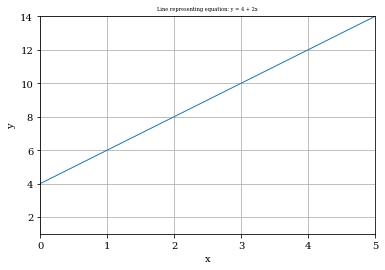

In [81]:
%matplotlib inline
x = np.array([0, 5])
y = 4 + 2 * x

fig, ax = plt.subplots()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Line representing equation: y = 4 + 2x")
ax.set_xlim([0, 5])
ax.set_ylim([1, 14])
ax.plot(x, y)
plt.grid(True)

>**Let us change the y-intercept, without changing the slope, and draw these three lines:**
$$y=4+2x$$
$$y=9+2x$$
$$y=-2+2x$$

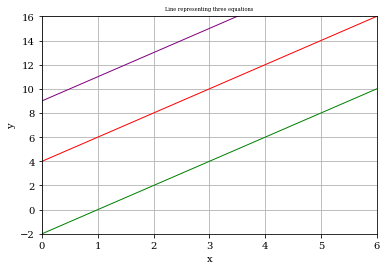

In [82]:
%matplotlib inline
x = np.linspace(-10, 20, 5) # start, finish, n points
y1 = -2 + 2*x
y2 = 4 + 2*x
y3 = 9 + 2*x

fig, ax = plt.subplots()
plt.xlabel('x')
plt.ylabel('y')
ax.set_xlim([0, 6])
ax.set_ylim([-2, 16])
plt.title("Line representing three equations")
ax.plot(x, y1, c='green')
ax.plot(x, y2, c='red')
ax.plot(x, y3, c='purple')
plt.grid(True)

>**Let us change the slope, without changing the y-intercept, and draw these three lines:**
$$y=4+2x$$
$$y=4+0x$$
$$y=4-2x$$

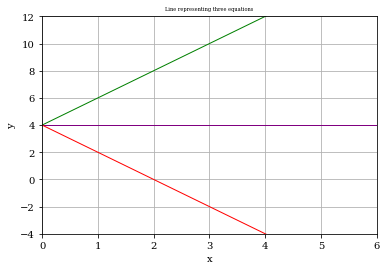

In [83]:
%matplotlib inline
x = np.linspace(-10, 20, 5) # start, finish, n points
y1 = 4 + 2*x
y2 = 4 + 0*x
y3 = 4 - 2*x

fig, ax = plt.subplots()
plt.xlabel('x')
plt.ylabel('y')
ax.set_xlim([0, 6])
ax.set_ylim([-4, 12])
plt.title("Line representing three equations")
ax.plot(x, y1, c='green')
ax.plot(x, y2, c='purple')
ax.plot(x, y3, c='red')
plt.grid(True)

**Example 2:**
- You went to a Rent-a-Car company to rant a car for few hours. The company representative told you that the base payment that you have to give is Rs5000/ and then for every hour you have to pay Rs2000/ additional price.
- Can you write a linear equation keeping in view of the dependent variable `rent price` and independent variable `time`<br>

$$ y = 5000 + 2000x$$
- Where, 
    - $y$ is the dependent/outcome/response variable `rent`.
    - Value 5000 is is the minimum/base value (y-intercept).
    - $x$ is the independent/feature/predictor variable `time`.
    - Value 2000 is the coefficient of $x$, which is the slope.

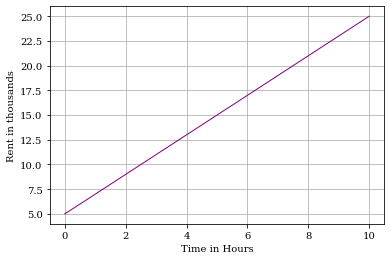

In [84]:
%matplotlib inline
x = np.linspace(0, 10, 5) # start, finish, n points
y = 5 + 2*x # values are in thousands

fig, ax = plt.subplots()
plt.xlabel('Time in Hours')
plt.ylabel('Rent in thousands')
ax.plot(x, y, c='purple')
plt.grid(True)

**Example 3:**
- Given the following linear equation which describes the relationship between the years of education, a person has achieved and the salary in thousands per month. Plot the linear equation to understand the relationship.<br>

$$ y = 20 + 5x$$
- Where, 
    - $y$ is the dependent/outcome/response variable `salary in thousands`.
    - Value 20 means Rs20K, which is the minimum/base salary, that one gets even if he/she is uneducated (y-intercept).
    - $x$ is the independent/feature/predictor variable `education in years`.
    - Value 5 means Rs5K, is the coefficient of $x$, which is the slope

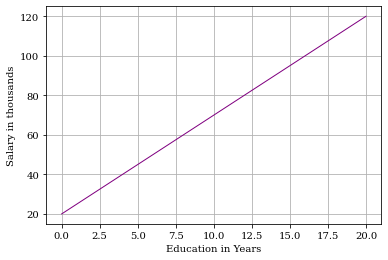

In [85]:
%matplotlib inline
x = np.linspace(0, 20, 5) # start, finish, n points
y = 20 + 5*x

fig, ax = plt.subplots()
plt.xlabel('Education in Years')
plt.ylabel('Salary in thousands')
ax.plot(x, y, c='purple')
plt.grid(True)

**Example 4:**
- Given the following linear equation which describes the relationship between the drug dosage and forgetness level.<br>

$$ y = 10 - 1.5x$$
- Where, 
    - $y$ is the dependent/outcome/response variable `forgetness level`.
    - Value 10 is the forgetness level if no drug is given to the patient (y-intercept).
    - $x$ is the independent/feature/predictor variable `drug dosage`.
    - Value 1.5 is the coefficient of $x$, which is the slope.

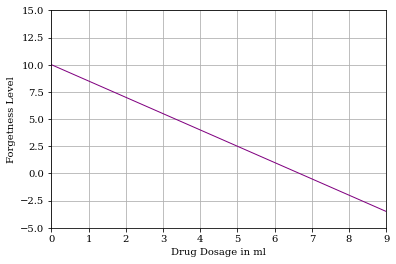

In [86]:
%matplotlib inline
x = np.linspace(0, 20, 5) # start, finish, n points
y = 10 - 1.5*x

fig, ax = plt.subplots()
ax.set_xlim([0, 9])
ax.set_ylim([-5, 15])
plt.xlabel('Drug Dosage in ml')
plt.ylabel('Forgetness Level')
ax.plot(x, y, c='purple')
plt.grid(True)

### b. What is a System of Linear Equations?
- A system of linear equations consists of two or more linear equations, that you deal with all together at once.
- An example system of linear equations having `two equations` and `two variables` is shown below:
$$2x+5y=1$$
$$3x-y=2$$

- An example system of linear equations having `three equations` and `three variables` is shown below:
$$x+y+z=3$$
$$𝑥 + 2𝑦 +3z= 0$$
$$𝑥 + 3𝑦 + 2𝑧 = 3$$    

**Solution(s) to a System of Linear Equations:**
- The solution to a system of linear equations are the values of variable that when put in the equation satisfies them all.
- The unique solution to a system of linear equations having two variables is a 2-D point $(x,y)$, where the two `lines` intersect.
- The unique solution to a system of linear equations having three variables is a 3-D point $(x,y,z)$, where the three `planes` intersect.
- The three scenarios that you may come across while trying to solve a system of linear equations are:
    - **Unique Solution:** You get exactly one value of every variable, that satisfies all the equations.
    - **Infinite Solution:** You get infinite many values for every variable, that satisfies all the equations.
    - **No Solution:** You get no value for every bariable, that satisfies all the equations.

## 2. How to Solve a System of Linear Equations
- There are different ways to solve a set of linear equations:
    - Substitution method
    - Elimination method
    - Graphing method

### a. Using Substitution Strategy:
- We substitute the value of a variable from one equation to the other.
- Use this strategy, whenever there is a variable in the system with a coefficient of 1.
- For example:<br>
$\hspace{1 cm}y = 3x$ and $-5x + 2y = 2$

### b. Using Elimination Strategy:
- Typically best option if no variable in system has coefficient of one.
- Use addition property of equations to eliminate variables and if necessary, multiply one or both equations to make elimination of a variable possible.
- For example:<br>
$\hspace{1 cm}4x - 3y = 35$ and $-3x + 8y = 10$

### c. Using Graphing Strategy:
- We can take a graph paper and draw the lines corresponding to the linear equations, which will of course make a straight line.
- If the two lines intersect, the point of intersection gives us the solution of the two unknowns.
- If the two lines are parallel to eachother, that means there is no solution to the set of two linear equations.
- If the two lines overlap, then we say that there are infinite solutions to the set of two linear equations.

**Example 5:**
Solve the following set of two linear equations with two unknowns using substitution strategy, or elimination strategy (at your own). Use Matplotlib and see if two lines representing the two equations intersect.<br>
$$ y = 1 + 2x$$
$$ y = 3 -\frac{1}{2}x$$

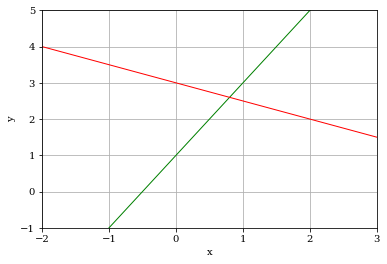

In [87]:
%matplotlib inline
x = np.linspace(-10, 10, 1000) # start, finish, n points
y1 = 1 + 2*x
y2 = 3 - 0.5*x
fig, ax = plt.subplots()
plt.xlabel('x')
plt.ylabel('y')
ax.set_xlim([-2, 3])
ax.set_ylim([-1, 5])
ax.plot(x, y1, c='green')
ax.plot(x, y2, c='red')
plt.grid(True)

>- The above graph represents the two equations as straight lines and the solution of these two set of linear equations with two unknowns is the point where both the equations are intersecting with each other, and that is $(\frac{4}{5},\frac{13}{5})$ or  $(0.8, 2.6)$

**Example 6:**
Solve the following set of two linear equations with two unknowns using substitution strategy, or elimination strategy (at your own). Use Matplotlib and see if two lines representing the two equations intersect.<br>
$$ y = 1 + 2x$$
$$ y = 3 + 2x$$

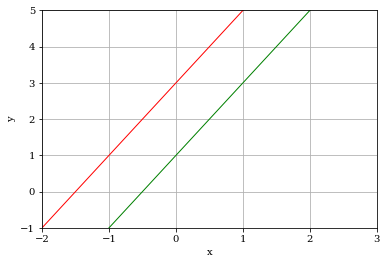

In [88]:
%matplotlib inline
x = np.linspace(-10, 10, 1000) # start, finish, n points
y1 = 1 + 2*x
y2 = 3 + 2*x
fig, ax = plt.subplots()
plt.xlabel('x')
plt.ylabel('y')
ax.set_xlim([-2, 3])
ax.set_ylim([-1, 5])
ax.plot(x, y1, c='green')
ax.plot(x, y2, c='red')
plt.grid(True)

>- No Solution (Parallel lines having same slope, but different y-intercept

**Example 7:**
Solve the following set of two linear equations with two unknowns using substitution strategy, or elimination strategy (at your own). Use Matplotlib and see if two lines representing the two equations intersect.<br>

$$ y = 1 + 2x$$

$$ 4x - 2y + 2 = 0$$

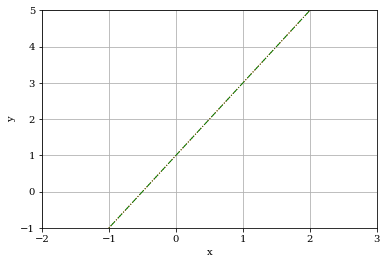

In [89]:
%matplotlib inline
x = np.linspace(-10, 10, 1000) # start, finish, n points
y1 = 1 + 2*x
y2 = 2/2 + (4/2)*x
fig, ax = plt.subplots()
plt.xlabel('x')
plt.ylabel('y')
ax.set_xlim([-2, 3])
ax.set_ylim([-1, 5])
ax.plot(x, y1, 'r:')
ax.plot(x, y2, 'g-.')
plt.grid(True)

>- Infinite Solutions (Parallel lines having same slope and same intercept)

**Example 8:** 
- Suppose a robber robbed a bank and escaped in a car with speed of 150Km/hr. The sheriff start following the robber after 5 minutes in a car with speed of 180Km/hr. 
- We need to find out, whether the sherrif can catch the robber. And if yes, after how much time and what is the distance that both have travelled at that point. For simplicity, you can ignore acceleration and traffic conditions.
- Let us write the two equations:
    - The bank robber equation is: $d = 150t$
    - The sherrif equation is: $d=180(t-5)$
- Let us solve these equations graphically by plotting them using Matplotlib and see their point of intersection

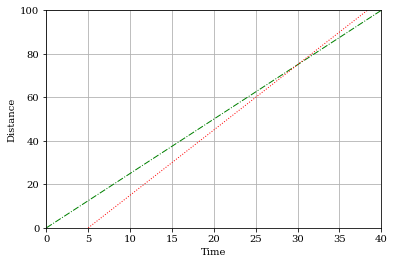

In [90]:
%matplotlib inline
t = np.linspace(0, 100, 100) # start, finish, n points
# to manage units on graph divide both equations by 60
d1 = 2.5*t
d2 = 3*(t-5)
fig, ax = plt.subplots()
plt.xlabel('Time')
plt.ylabel('Distance')
ax.set_xlim([0, 40])
ax.set_ylim([0, 100])
ax.plot(t, d1, c='green',linestyle= '-.')
ax.plot(t, d2, c='r', linestyle=':')
plt.grid(True)

The above line graph shows that the two lines intersect at point $(30, 75)$. So we can infer that the sheriff has caught the robber after 30 minutes drive and after both has travelled a distnce of 75 Km.

>- **Replot the line graph, if the speed of the sheriff's car and robber's car is same**

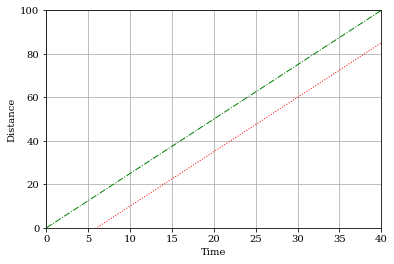

In [91]:
%matplotlib inline
t = np.linspace(0, 100, 100) # start, finish, n points
d1 = 0 + 2.5*t
d2 = -15 + 2.5*t
fig, ax = plt.subplots()
plt.xlabel('Time')
plt.ylabel('Distance')
ax.set_xlim([0, 40])
ax.set_ylim([0, 100])
ax.plot(t, d1, c='green',linestyle= '-.')
ax.plot(t, d2, c='r', linestyle=':')
plt.grid(True)

The two lines are parallel and never intersect. So we can infer that the sheriff will never be able to catch the theif.

>- **Replot the line graph, if the speed of the sheriff's car and robber's car is same as well as they leave at the same time**

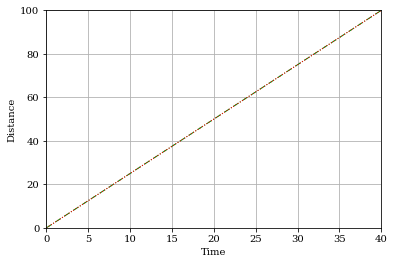

In [92]:
%matplotlib inline
t = np.linspace(0, 100, 100) # start, finish, n points
d1 = 2.5*t
d2 = 2.5*t
fig, ax = plt.subplots()
plt.xlabel('Time')
plt.ylabel('Distance')
ax.set_xlim([0, 40])
ax.set_ylim([0, 100])
#ax.plot(t, d1, c='green')
#ax.plot(t, d2, c='red')
ax.plot(t, d1, c='green',linestyle= '-.')
ax.plot(t, d2, c='r', linestyle=':')
plt.grid(True)

The two lines are having same slope and same y-intercept. So there are infinite solutions, the sheriff can catch the theif any time.

### d. Consistent and Inconsistent System of Linear Equations

<img align="center" width="900" height="900"  src="images/LA/consistentequations1.png"  >

### e. Plotting a Linear Equation with Three Variables
<img align="left" width="300" height="300"  src="images/LA/3Dimage.png"  >
<img align="right" width="500" height="500"  src="images/LA/plotting3varline.png"  >

### f. Solving set of Three Linear Equations with Three Variables
- The way we can solve a system of two linear equations with two variables using elimination and substitution strategy, we can solve a system of three linear equations with three variables using elimination and substitution.
- The way we can visually plot the solution of a system of two linear equations with two variables by drawing the two lines and checking out their point of intersection. 
- Similarly, we can visually plot solution of a system of three linear equations with three variables by drawing the three planes for the three equations. Remember when two planes intersect, you get a line. The third plane may intersect in such a way that you get a unique point of intersection to all three planes. The third poane may intersect in such a way that you get a common line instead of a point. 
- Keeping this in mind, there can be following possibilities:

<img align="right" width="300" height="300"  src="images/LA/3DUniquesol.png"  >

**Consistant Independent System of Linear Equations:** 
- In this case, there is a unique solution.
- Geometrically, all three planes intersect at exactly one point. In other words there is exactly one point that lies on all the three planes.
- You can visualize it as the corner of your room, where the two walls and the floor intersect at exactly one point/corner.
- An example of such a system of linear equations is shown below having a solution of $(4, 1, -2)$:

$ \hspace{2 cm}x +y  +z  = 3$

$ \hspace{2 cm}x +2y +3z = 0$

$ \hspace{2 cm}x +3y +2z = 3$

<img align="right" width="300" height="300"  src="images/LA/3DInfinitesol.png"  >

**Consistant Dependent System of Linear Equations:** 
- In this case, there are infinite solutions.
- Geometrically, all the three planes will intersect with eachother and make a line of intersection instead of a point.
- An example of such a system of linear equations is:

$ \hspace{2 cm}2x + 2y +2z = -2$

$ \hspace{2 cm}2x + 3y +2z = 4$

$ \hspace{2 cm}x + y +z = -1$

<img align="right" width="500" height="500"  src="images/LA/3DNosol.png"  >

**Inconsistant System of Linear Equations:** 
- In this case, there is no solution.
- There are three scenarios for this:
    - The three planes intersect with each other, but not at a common point
    - Two of the planes are parallel and intersect with the third plane, but not with each other
    - All three planes are parallel, so there is no point of intersection
- Example of such a system of linear equations are:
    - $ x  +y +z = 1$, $ 2x  +2y +2z = 2$, and $ 4x +4y +4z = 4$
    - $ 2x  -4y +z = 3$, $ 8x  -2y +4z = 7$, and $ -4x +y -2z = -14$

### g. Practice Problems
>- **A system of linear equations is consistent if it has one or more solutions and inconsistent if no solutions exist. Furthermore, a consistent system is said to be independent if it has exactly one solution (often referred to as the unique solution) and dependent if it has more than one solution. Two systems of equations are
equivalent if they have the same solution set.**

**Problem 1:** If 2 adult tickets and 1 child ticket cost 32, and if 1 adult ticket and 3 child tickets cost 36,
what is the price of each?

$$2x + y = 32$$
$$x + 3y = 36$$


**Problem 2:** Jasmine wants to use milk and orange juice to increase the amount of calcium and vitamin A in her daily diet. An ounce of milk contains 37 milligrams of calcium and 57 micrograms* of vitamin A. An ounce of orange juice contains 5 milligrams of calcium and 65 micrograms of vitamin A. How many ounces of milk and orange juice should Jasmine drink each day to provide exactly 500 milligrams of calcium and 1,200 micrograms of vitamin A?
$$37x + 5y = 500$$
$$57x + 65y = 1200$$

## 4. Solving System of Linear Equations using Matrix Algebra
- Most linear systems involve large numbers of equations and variables. It is impractical to try to solve such systems by hand.
- In solving systems of equations using elimination and substitution, the coefficients of the variables and the constant terms play a central role. 
- The process can be made more efficient and for the computer to solve, we represent the linear equations in the form of matrices and vectors.
- We can later apply different techniques on the matrix equation, to solve for unknowns. 
- Some of the most commonly used techniques are:
    - Gaussian Elimination.
    - Gauss Jordan Elimination.
    - Cramer's Rule.
    - Matrix Inversion Method.

### a. Writing  System of Linear Equation in Matrix Form

**System of Two Linear Equations having two unknowns ($x_1$, and  $x_2$), with four coefficients:**<br>
$$ a_{1,1}x_1 + a_{1,2}x_2 = b_1 $$
$$ a_{2,1}x_1 + a_{2,2}x_2  = b_2 $$

- So the above system of two linear equations with two variables can be written in matrix form as:
$$
\begin{bmatrix} a_{1,1} & a_{1,2}  \\ a_{2,1} & a_{2,2} \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2  \end{bmatrix}=
\begin{bmatrix} b_1 \\ b_2  \end{bmatrix} 
$$

**System of Three Linear Equations having three unknowns($x_1, x_2$, and  $x_3$), with nine coefficients:**<br>

$$ a_{1,1}x_1 + a_{1,2}x_2 + a_{1,3}x_3 = b_1 $$
$$ a_{2,1}x_1 + a_{2,2}x_2 + a_{2,3}x_3 = b_2 $$
$$ a_{3,1}x_1 + a_{3,2}x_2 + a_{3,3}x_3 = b_3 $$

$$
\begin{bmatrix} a_{1,1} & a_{1,2} & a_{1,3}  \\ a_{2,1} & a_{2,2} & a_{2,3} \\a_{3,1} & a_{3,2} & a_{3,3}\end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \\ x_3  \end{bmatrix}=
\begin{bmatrix} b_1 \\ b_2 \\ b_3  \end{bmatrix} 
$$


$$ Ax = b$$

- Where,
    - $A$ is the matrix of coefficients, or scalar values (`known matrix`)
    - $x$ is a vector of variables (`unknown vector`)
    - $b$ is a vector containing constants on the RHS of equations (`known vector`)
        - If $b = 0_{nx1}$, we say that it is a homogeneous system of equations
        - If $b \neq 0_{nx1}$, we say that it is a non-homogeneous system of equations
> Matrix `$A$`, when applied on vector `$x$` of unknowns, transforms it into vector `$b$` of known values.

### b. Solving set of Linear Equations Using Gaussian Elimination Method
- Gaussian Elimination is a method for solving systems of linear equations with several unknown variables. It works by bringing the matrix representing the equations into row echelon form and resolving the unknown variables by back-substitution.
- Gaussian elimination is a method named after German mathematician Larl Friedrich Gauss.
- Suppose we want to solve a system of three linear equations with three unknowns given below:
$$ a_{1,1}x_1 + a_{1,2}x_2 + a_{1,3}x_3 = b_1 $$
$$ a_{2,1}x_1 + a_{2,2}x_2 + a_{2,3}x_3 = b_2 $$
$$ a_{3,1}x_1 + a_{3,2}x_2 + a_{3,3}x_3 = b_3 $$

- **Step 1**: We represent the system of equations in `augmented matrix` form, which contains all the essential information about the linear system — everything but the names of the variables. The augmented matrix for above system of linear equations is shown below:
$$
\begin{bmatrix} a_{1,1} & a_{1,2} & a_{1,3}  \bigm| & b_1 \\ a_{2,1} & a_{2,2} & a_{2,3} \bigm| & b_2 \\a_{3,1} & a_{3,2} & a_{3,3} \bigm| & b_3 \end{bmatrix}
$$

- **Step 2**: Then we apply different operations on augmented matrix in no specific order, with the goal to eliminate one variable at a time to achieve `upper triangular marix` (Row echelon form is a diagonal matrix where all entries below a leading coefficient are zero. Some textbooks also state that the leading coefficient must equal one):
$$
\begin{bmatrix} 1 & a_{1,2} & a_{1,3}  \bigm| & b_1 \\ 0 & 1 & a_{2,3} \bigm| & b_2 \\0 & 0 & 1 \hspace{.4 cm} \bigm| & b_3 \end{bmatrix}
$$
- The matrix operations performed for triangularization are:
    - Interchange order of any two rows ($R_i = R_j$).
    - Multiply a row by a non-zero constant($R_i = nR_j$
    - Add a multiple of a row to another row ($R_j = R_i + R_j$)
    
- **Step 3**:Once in this form, we can say that $x_3 = b_3$ and use `back substitution` to solve for $x_2$ and $x_1$.

**Example 9:** Given the system of three linear equations with three unknowns, solve for unknowns by using Gauss Elimination method:
- Write the System of Linear Equation in Augmented Matrix Form: An augmented matrix is a rectangular array of numbers that represents a system of equations.
    $$𝑥 + 𝑦 + 𝑧 = 3$$
    $$𝑥 + 2𝑦 +3z= 0$$
    $$𝑥 + 3𝑦 + 2𝑧 = 3$$    

- Step 1: Augmented Matrix of system of equations
  $$
\begin{bmatrix}
    1 & 1 & 1 \bigm| & 3 \\
    1 & 2 & 3 \bigm| & 0  \\
    1 & 3 & 2\bigm| & 3 
\end{bmatrix}
$$
- Step 2: Convert it into row-echlon form (by performing triangularization)

$\hspace{3 cm} R_2 = R_2 - R1:\hspace{1 cm} \begin{bmatrix}1 & 1 & 1 \bigm| & 3 \\ 0 & 1 & 2 \bigm| & -3  \\ 1 & 3 & 2\bigm| & 3 \end{bmatrix}$ 


$\hspace{3 cm} R_3 = R_3 - R1:\hspace{1 cm} \begin{bmatrix}1 & 1 & 1 \bigm| & 3 \\ 0 & 1 & 2 \bigm| & -3  \\ 0 & 2 & 1\bigm| & 0 \end{bmatrix}$ 


$\hspace{3 cm} R_3 = 2R_2:\hspace{1 cm} \begin{bmatrix}1 & 1 & 1 \bigm| & 3 \\ 0 & 2 & 4 \bigm| & -6  \\ 0 & 2 & 4\bigm| & 0 \end{bmatrix}$ 



$\hspace{3 cm} R_3 = R_2 - R_3:\hspace{1 cm} \begin{bmatrix}1 & 1 & 1 \bigm| & 3 \\ 0 & 2 & 4 \bigm| & -6  \\ 0 & 0 & 3\bigm| & -6 \end{bmatrix}$ 
   
     
- Step 3: Back Substitution
Now convert the matrix in row-echlon form to a system of linear equations and solve:
$$𝑥 + 𝑦 + 𝑧 = 3$$
$$    2𝑦 +4z= -6$$
$$        3𝑧 = -6$$    
Perform back substitution, you get $z=-2, y=1, x=4$

**Practice Problems:** Use paper pencil to solve following system of linear equations:

(i)  $\hspace{.5 cm}x +3𝑦 + 4𝑧 = 4$ $\hspace{2 cm}−𝑥 + 3𝑦 +2z = 2$ $\hspace{2 cm}3𝑥 + 9𝑦 + 6𝑧 = -6$ 

(ii) $\hspace{.5 cm}x +4𝑦 + 3𝑧 = 1$ $\hspace{2 cm}𝑥 + 2𝑦 + 9z = 1$ $\hspace{2 cm}𝑥 + 6𝑦 + 6𝑧 = 1$ 

(iii) $\hspace{.5 cm}x +3𝑦 + 3𝑧 = 2$ $\hspace{2 cm}3𝑥 + 9𝑦 +3z = 3$ $\hspace{2 cm}3𝑥 + 6𝑦 + 6𝑧 = 4$ 

> Verify your answers using this online calculator https://www.handymath.com/cgi-bin/matrix3d.cgi

### c. Solving set of Linear Equations Using Gauss Jordan Method
- Gauss-Jordan elimination is another method for solving systems of equations in matrix form. It is really a
continuation of Gaussian elimination. However, it works for non-square matrices as well.
- Suppose we want to solve a system of three linear equations with three unknowns given below:
$$ a_{1,1}x_1 + a_{1,2}x_2 + a_{1,3}x_3 = b_1 $$
$$ a_{2,1}x_1 + a_{2,2}x_2 + a_{2,3}x_3 = b_2 $$
$$ a_{3,1}x_1 + a_{3,2}x_2 + a_{3,3}x_3 = b_3 $$

- **Step 1**: We represent the system of equations in `augmented matrix` form. An augmentation matrix for a system of three linear equations with three unknowns is of the form:
$$
\begin{bmatrix} a_{1,1} & a_{1,2} & a_{1,3}  \bigm| & b_1 \\ a_{2,1} & a_{2,2} & a_{2,3} \bigm| & b_2 \\a_{3,1} & a_{3,2} & a_{3,3} \bigm| & b_3 \end{bmatrix}
$$

- **Step 2**: Then we apply different operations on augmented matrix in no specific order, with the goal to eliminate one variable at a time to achieve reduced row-echlon form or `diagonal matrix` (non-zero elements along main diagonal and zeros every where else)):
$$
\begin{bmatrix} 1 & 0 & 0  \bigm| & b_1 \\ 0 & 1 & 0 \bigm| & b_2 \\0 & 0 & 1 \bigm| & b_3 \end{bmatrix}
$$

- **Step 3**: Once in this form, we can say that $x_1 = b_1$, $x_2 = b_2$ and $x_3 = b_3$.

**Example 10:** Given the system of three linear equations with three unknowns, solve for unknowns by using Gauss Elimination method:
- Write the System of Linear Equation in Augmented Matrix Form: An augmented matrix is a rectangular array of numbers that represents a system of equations.
    $$5𝑥 + 2𝑦  = 2$$
    $$2𝑥 + 𝑦 -z= 0$$
    $$2𝑥 + 3𝑦 - 𝑧 = 3$$    

- Step 1: Augmented Matrix of system of equations
  $$
\begin{bmatrix}
    5 & 2 & 0 \bigm| & 2 \\
    2 & 1 & -1 \bigm| & 0  \\
    2 & 3 & -1\bigm| & 3 
\end{bmatrix}
$$
- Step 2: Convert it into reduced row-echlon form

$\hspace{3 cm} R_1 = \frac{1}{5}R_1:\hspace{5 cm} \begin{bmatrix}1 & 2/5 & 0 \bigm| & 2/5 \\ 2 & 1 & -1 \bigm| & 0  \\ 2 & 3 & -1\bigm| & 3 \end{bmatrix}$ 

$\hspace{3 cm} R_2 = R_2 - 2R_1:\hspace{4 cm} \begin{bmatrix}1 & 2/5 & 0 \bigm| & 2/5 \\ 0 & 1/5 & -1 \bigm| & -4/5  \\ 2 & 3 & -1\bigm| & 3 \end{bmatrix}$ 



$\hspace{3 cm} R_3 = R_3 - 2R_1:\hspace{4 cm} \begin{bmatrix}1 & 2/5 & 0 \bigm| & 2/5 \\ 0 & 1/5 & -1 \bigm| & -4/5  \\ 0 & 11/5 & -1\bigm| & 11/5 \end{bmatrix}$ 


$\hspace{3 cm} R_2 = 5R_2$ and $R_3=5R_3:\hspace{2.6 cm} \begin{bmatrix}1 & 2/5 & 0 \bigm| & 2/5 \\ 0 & 1 & -5 \bigm| & -4  \\ 0 & 11 & -5\bigm| & 11 \end{bmatrix}$ 



$\hspace{3 cm} R_2 = R_2 - R_3:\hspace{4.55 cm} \begin{bmatrix}1 & 2/5 & 0 \bigm| & 2/5 \\ 0 & -10 & 0 \bigm| & -15  \\ 0 & 11 & -5\bigm| & 11 \end{bmatrix}$ 



$\hspace{3 cm} R_2 = \frac{-1}{10}R_2$ and $R_3=\frac{1}{11}R_3:\hspace{2 cm} \begin{bmatrix}1 & 2/5 & 0 \bigm| & 2/5 \\ 0 & 1 & 0 \bigm| & 3/2  \\ 0 & 1 & -5/11\bigm| & 1 \end{bmatrix}$ 


$\hspace{3 cm} R_1 = R_1 - \frac{2}{5}R_2$ and $R_3=R_3 - R_2:\hspace{1 cm} \begin{bmatrix}1 & 0 & 0 \bigm| & -1/5 \\ 0 & 1 & 0 \bigm| & 3/2  \\ 0 & 0 & -5/11\bigm| & -1/2 \end{bmatrix}$ 


$\hspace{3 cm} R_3 = \frac{-11}{5}R_3:\hspace{5 cm} \begin{bmatrix}1 & 0 & 0 \bigm| & -1/5 \\ 0 & 1 & 0 \bigm| & 3/2  \\ 0 & 0 & 1\bigm| & 11/10 \end{bmatrix}$ 




- Step 3:
$x=-1/5, y=3/2, z=11/10$

### d. Solving set of Linear Equations Using Cramer's Rule
- Cramer’s Rule uses determinants to determine the solution of a system of linear equations in matrix form.
- Cramer's rule only works on square matrices that have a non-zero determinant and a unique solution.
- Consider a system of three linear equations with three unknowns:

$$ a_{1,1}x_1 + a_{1,2}x_2 + a_{1,3}x_3 = b_1 $$
$$ a_{2,1}x_1 + a_{2,2}x_2 + a_{2,3}x_3 = b_2 $$
$$ a_{3,1}x_1 + a_{3,2}x_2 + a_{3,3}x_3 = b_3 $$


- These three equations can be written in matrix form as:
$$
\begin{bmatrix} a_{1,1} & a_{1,2} & a_{1,3}  \\ a_{2,1} & a_{2,2} & a_{2,3} \\a_{3,1} & a_{3,2} & a_{3,3}\end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \\ x_3  \end{bmatrix}=
\begin{bmatrix} b_1 \\ b_2 \\ b_3  \end{bmatrix} 
$$

$$ Ax = b$$


- Cramer's Formula for the three unknowns in this scenario is:

$$x_1 = \frac{D_{x1}}{D}$$

$$x_2 = \frac{D_{x2}}{D}$$

$$x_3 = \frac{D_{x3}}{D}$$

- Where,
- D is the determinant of matrix $A = \begin{bmatrix} a_{1,1} & a_{1,2} & a_{1,3}  \\ a_{2,1} & a_{2,2} & a_{2,3} \\a_{3,1} & a_{3,2} & a_{3,3}\end{bmatrix}$


- $D_x$ is the determinant of matrix $A$ by replacing $x_1$-column by the vector of right hand side of the matrix equation: $\begin{vmatrix} b_1 & a_{1,2} & a_{1,3}  \\ b_2 & a_{2,2} & a_{2,3} \\b_3 & a_{3,2} & a_{3,3}\end{vmatrix}$



- $D_y$ is the determinant of matrix $A$ by replacing $x_2$-column by the vector of right hand side of the matrix equation: $\begin{vmatrix} a_{1,1} & b_1 & a_{1,3}  \\ a_{2,1} & b_2 & a_{2,3} \\a_{3,1} & b_2 & a_{3,3}\end{vmatrix}$




- $D_z$ is the determinant of matrix $A$ by replacing $x_3$-column by the vector of right hand side of the matrix equation: $\begin{vmatrix} a_{1,1} & a_{1,2} & b_1  \\ a_{2,1} & a_{2,2} & b_2 \\a_{3,1} & a_{3,2} & b_3\end{vmatrix}$




**Example 11:** Given the system of two linear equations with two unknowns, solve for unknowns by using Cramer's Rule
    $$𝑥 + 2𝑦 = 3$$
    $$4𝑥 + 5𝑦 = 6$$

$$
\begin{bmatrix} 1 &  2 \bigm| & 3 \\  4 & 5  \bigm| & 6 \end{bmatrix}
$$

$\hspace{4 cm}D = \begin{vmatrix} 1 &  2  \\  4 & 5 \end{vmatrix} = 5 - 8 = -3$


$\hspace{4 cm}D_x = \begin{vmatrix} 3 &  2  \\  6 & 5 \end{vmatrix} = 15 - 12 = 3$


$\hspace{4 cm}D_y = \begin{vmatrix} 1 &  3  \\  4 & 6 \end{vmatrix} = 6 - 12 = -6$

$\hspace{2 cm}x = \frac{D_x}{D} = \frac{3}{-3} = -1$

$\hspace{2 cm}y = \frac{D_y}{D} = \frac{-6}{-3} = 2$


**Example 12:** Given the system of three linear equations with three unknowns, solve by using Cramer's Rule:
    $$𝑥 + 4𝑦 +3z = 1$$
    $$𝑥 + 2𝑦 +9z= 1$$
    $$𝑥 + 6𝑦 + 6𝑧 = 1$$    

$$
\begin{bmatrix} 1 &  4 & 3 \bigm| & 1 \\  1 & 2 & 9 \bigm| & 1  \\ 1 & 6 & 6\bigm| & 1 \end{bmatrix}
$$

$\hspace{4 cm}D = \begin{vmatrix} 1 &  4 & 3 \\  1 & 2 & 9 \\ 1 & 6 & 6 \end{vmatrix} = 1(12-54) - 4(6-9)+3(6-2) = -18$

$\hspace{4 cm}D_x = \begin{vmatrix} 1 &  4 & 3 \\  1 & 2 & 9 \\ 1 & 6 & 6 \end{vmatrix} = 1(12-54) - 4(6-9)+3(6-2) = -18$

$\hspace{4 cm}D_y = \begin{vmatrix} 1 &  1 & 3 \\  1 & 1 & 9 \\ 1 & 1 & 6 \end{vmatrix} = 1(6-9) - 1(6-9)+3(1-1) = 0$

$\hspace{4 cm}D_z = \begin{vmatrix} 1 &  4 & 1 \\  1 & 2 & 1 \\ 1 & 6 & 1 \end{vmatrix} = 1(2-6) - 4(1-1)+1(6-2) = 0$

$\hspace{2 cm}x = \frac{D_x}{D} = \frac{-18}{-18} = 1$

$\hspace{2 cm}y = \frac{D_y}{D} = \frac{0}{-18} = 0$

$\hspace{2 cm}z = \frac{D_z}{D} = \frac{0}{-18} = 0$

### e. Solving set of Linear Equations Using Matrix Inversion Method

- Consider a system of three linear equations with three unknowns:

$$ a_{1,1}x_1 + a_{1,2}x_2 + a_{1,3}x_3 = b_1 $$
$$ a_{2,1}x_1 + a_{2,2}x_2 + a_{2,3}x_3 = b_2 $$
$$ a_{3,1}x_1 + a_{3,2}x_2 + a_{3,3}x_3 = b_3 $$


- These three equations can be written in matrix form as:
$$
\begin{bmatrix} a_{1,1} & a_{1,2} & a_{1,3}  \\ a_{2,1} & a_{2,2} & a_{2,3} \\a_{3,1} & a_{3,2} & a_{3,3}\end{bmatrix}_{3\times 3}\hspace{1 cm}
\begin{bmatrix} x_1 \\ x_2 \\ x_3  \end{bmatrix}_{3\times 1}\hspace{1 cm}=\hspace{1 cm} 
\begin{bmatrix} b_1 \\ b_2 \\ b_3  \end{bmatrix}_{3\times 1}
$$

$$ Ax = b$$

$$ A^{-1}Ax = A^{-1}b $$

$$  Ix = A^{-1}b $$

$$  x = A^{-1}b $$



> **Note: This is possible if and only if:**
    >- Matrix $A$ is a square matrix
    >- Matrix $A$ is non-singular, i.e., its determinant is non-zero

**Example 13:** Solve the set of two linear equations having two unknowns, by Matrix Inversion technique using paper pencil:
$$ 4x + 2y = 4 $$
$$ -5x - 3y = -7 $$ 
We can write these two equations in Matrix form as:<br>
$$
\begin{bmatrix} 4 & 2 \\  -5 & -3  \end{bmatrix}
\begin{bmatrix} x \\ y  \end{bmatrix} =  
\begin{bmatrix} 4 \\ -7  \end{bmatrix}
$$

$$
Ax = b
$$

$$
x = A^{-1}b
$$


$$
\begin{bmatrix} x \\ y  \end{bmatrix}  =  \frac{1}{det(A)}\begin{bmatrix}    -3 & -2\\ 5 & 4 \end{bmatrix}  
\begin{bmatrix} 4 \\ -7  \end{bmatrix}
$$


$$
\begin{bmatrix} x \\ y  \end{bmatrix}  =  \frac{1}{-12-(-10)}\begin{bmatrix}    -3 & -2\\ 5 & 4 \end{bmatrix}  
\begin{bmatrix} 4 \\ -7  \end{bmatrix}
$$

$$
\begin{bmatrix} x \\ y  \end{bmatrix}  =  \begin{bmatrix}    3/2 & 1\\ -5/2 & -2 \end{bmatrix}  
\begin{bmatrix} 4 \\ -7  \end{bmatrix}
$$

$$
\begin{bmatrix} x \\ y  \end{bmatrix} =   \begin{bmatrix}    -1 \\ 4 \end{bmatrix}  
$$
>- **So the solution is $x=-1$ and $y=4$**
>- **Let us perfrom the above steps in Python**

In [93]:
A = np.array([[4, 2], [-5, -3]])
b = np.array([4,-7])
print("Matrix A:\n", A)
print("Vector b: ", b)

Matrix A:
 [[ 4  2]
 [-5 -3]]
Vector b:  [ 4 -7]


In [94]:
Ainv = np.linalg.inv(A)
print("Inverse of A:\n", Ainv)

Inverse of A:
 [[ 1.5  1. ]
 [-2.5 -2. ]]


In [95]:
np.dot(Ainv, b)

array([-1.,  4.])

In [96]:
np.linalg.solve(A, b)

array([-1.,  4.])

**Example 14:** Solve the set of two linear equations having two unknowns, by Matrix Inversion technique using Python:
$$ x - \frac{1}{2}y = 1 $$
$$ -\frac{1}{2}x + y = -1 $$

- The above two equations can be written in matrix form as shown below. 
$$
\begin{bmatrix} 1 & -1/2 \\ -1/2 & 1\end{bmatrix} 
\begin{bmatrix} x \\ y \end{bmatrix} =  
\begin{bmatrix} 1 \\ -1  \end{bmatrix}
$$


<br><br>
$$Ax = b$$
$$x = A^{-1}b$$
$$x = \begin{bmatrix} 4/3 & 2/3 \\2/3 & 4/3\end{bmatrix} \begin{bmatrix} 1 \\ -1  \end{bmatrix}$$

$$x =  \begin{bmatrix} 2/3 \\ -2/3  \end{bmatrix}$$

In [97]:
A = np.array([[1, -1/2], [-1/2, 1]])
b = np.array([1,-1])
Ainv = np.linalg.inv(A)
x = np.dot(Ainv, b)
x = np.linalg.solve(A, b)
x

array([ 0.66666667, -0.66666667])

**Example 15:** Solve the set of three linear equations having three unknowns, by Matrix Inversion technique using Python:
$$ x + 2y + 3z = -7 $$
$$ 2x - 3y - 5z   = 9 $$
$$ -6x - 8y + z = -22$$

- The above three equations can be written in matrix form as shown bbelow. 
$$
\begin{bmatrix} 1 & 2 & 3 \\ 2 & -3 & -5 \\  -6 & -8 & 1\end{bmatrix} 
\begin{bmatrix} x \\ y  \\ z\end{bmatrix} =  
\begin{bmatrix} -7 \\ 9 \\ -22  \end{bmatrix}
$$


<br><br>
$$
Ax = b
$$
- Above equation says, that vector $x$ lands on vector $bb$ via transformation matrix $A$

$$
x = A^{-1}b
$$

In [98]:
A = np.array([[1, 2, 3], [2, -3, -5], [-6, -8, 1]])
b = np.array([-7,9, -22])
Ainv = np.linalg.inv(A)
x = np.dot(Ainv, b)
x = np.linalg.solve(A, b)
x

array([-1.,  3., -4.])

**Example 16:** Solve the set of four linear equations having four unknowns, by Matrix Inversion technique using Python:
$$ w + x + y = 75 $$
$$ w + x + z  = 80 $$
$$ w + y + z = 75$$
$$ x + y + z  = 70 $$

- The above three equations can be written in matrix form as shown below. 
$$
\begin{bmatrix} 1 & 1 & 1 & 0 \\ 1 & 1 & 0 & 1 \\  1 & 0 & 1 & 1 \\ 0 & 1 & 1 & 1\end{bmatrix} 
\begin{bmatrix} w \\ x \\ y  \\ z\end{bmatrix} =  
\begin{bmatrix} 75 \\ 80 \\ 75 \\ 70  \end{bmatrix}
$$


<br><br>
$$
Ax = b
$$
- Above equation says, that vector $x$ lands on vector $bb$ via transformation matrix $A$

$$
x = A^{-1}b
$$





In [99]:
A = np.array([[1, 1, 1, 0], [1, 1, 0, 1], [1, 0, 1, 1], [0, 1, 1, 1]])
b = np.array([75,80, 75,70])
Ainv = np.linalg.inv(A)
x = np.dot(Ainv, b)
x = np.linalg.solve(A, b)
x

array([30., 25., 20., 25.])

### f. Limitations of Matrix Inversion Method

**Limitation 1: ($A$ must be non-singular)**
- The matrix $A$ must be non-singular, that is its determinant must be non-zero, or, all of its columns are linearly independent. An example system having a non-singular matrix $A$ is shown below:
$$-9x - 15y = -15$$
$$3x + 5y = -10$$

$$
\begin{bmatrix} -9 & -15 \\  3 & 5  \end{bmatrix}
\begin{bmatrix} x \\ y  \end{bmatrix} =  
\begin{bmatrix} 15 \\ -10  \end{bmatrix}
$$

- The above two equations are linearly dependent, this can be observed from the coefficients of two equations
- The determinant of coefficient matrix is zero, therefore, the inverse of matrix $A$ does not exist and hence the solution.
- You can confirm this by solving the system of equations using either substitution strategy, or elimination strategy at your own.
- Finally if you plot a graph of these two equations, you will get two parallel lines. This can be observed from the rearranged equations below having same slope and different y-intercept. 
$$ y = \frac{-9}{15}x + 1$$
$$ y = \frac{-3}{5}x - 1$$

**Limitation 2: ($A$ must Square)**
- The number of equations and number of variables must be same, only then you have a square matrix, whose inverse can be calculated.

**Possible Solutions:**
- Gauss Jordan Elimination
- Calculating Matrix Inverse using Moore Penrose Pseudo-inverse
- Solving non-square Matrix using Singular Value Decomposition
- Solving non-square Matrix using QR Decomposition
- Solving non-square Matrix using Cholesky Decomposition

## 5. Categories of System of Linear Equations
- Uptill now we have seen linear system of equations which have same number of equations as the number of unknowns, hence, the coefficient matrix $A$ becomes a square matrix. Since the coefficient matrix $A$ is square therefore, we can find the solution using simple matrix inversion method.

 <h3 align="center">$ A_{n\times m}\hspace{.2 cm}x_{m\times 1}\hspace{.3 cm}=\hspace{.3 cm}b_{n\times 1} \hspace{1 cm}$ and $ \hspace{.3 cm}n\hspace{.3 cm}=\hspace{.3 cm}m$ </h3>
 
  <h3 align="center">$ A_{n\times m}\hspace{.2 cm}x_{m\times 1}\hspace{.3 cm}=\hspace{.3 cm}b_{n\times 1} \hspace{1 cm}$ and $ \hspace{.3 cm}n\hspace{.3 cm}\gt\hspace{.3 cm}m$ </h3>
  
   <h3 align="center">$ A_{n\times m}\hspace{.2 cm}x_{m\times 1}\hspace{.3 cm}=\hspace{.3 cm}b_{n\times 1} \hspace{1 cm}$ and $ \hspace{.3 cm}n\hspace{.3 cm}\lt\hspace{.3 cm}m$ </h3>

### a. Overdetermined Systems of Linear Equations
- An overdetermined system of equations is a system in which the number of equations is greater than the number of unknowns. 
- Such a system cannot be solved using simple matrix inversion method, as the coefficient matrix is not square and thus cannot be inverted. 
- In machine learning many a times we have overdetermined systems that we need to solve. For example, a dataset having thousands of houses but only a few features.
    - Consistent Overdetermined System having `Unique` Solution
    - Consistent Overdetermined System having `Infinite` Solution
    - In-Consistent Overdetermined System having `No` Solution
    
    
 <h3 align="center">$ A_{n\times m}\hspace{.2 cm}x_{m\times 1}\hspace{.3 cm}=\hspace{.3 cm}b_{n\times 1} \hspace{1 cm}$ and $ \hspace{.3 cm}n\hspace{.3 cm}\gt\hspace{.3 cm}m$ </h3>

**(i) Consistent Overdetermined System having `Unique` Solution:**
$$\hspace{3 cm}x+y=3$$
$$\hspace{3 cm}x-y=1$$
$$\hspace{3 cm}3x-y=5$$

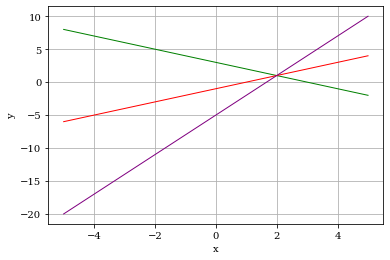

In [100]:
%matplotlib inline
x = np.linspace(-5, 5, 5) # start, finish, n points
y1 = 3 - x
y2 = -1 + x
y3 = -5 + 3*x

fig, ax = plt.subplots()
plt.xlabel('x')
plt.ylabel('y')
ax.plot(x, y1, c='green')
ax.plot(x, y2, c='red')
ax.plot(x, y3, c='purple')
plt.grid(True)

**(ii) Consistent Overdetermined System having `Infinite` Solution:**
$$x+y=1$$
$$2x+2y=2$$
$$ 3x+3y=3$$

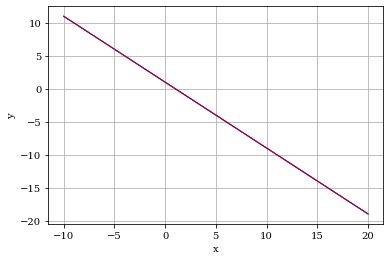

In [101]:
%matplotlib inline
x = np.linspace(-10, 20, 5) # start, finish, n points
y1 = 1 - x
y2 = 2/2 - (2/2)*x
y3 = 3/3 - (3/3)*x

fig, ax = plt.subplots()
plt.xlabel('x')
plt.ylabel('y')
ax.plot(x, y1, c='green')
ax.plot(x, y2, c='red')
ax.plot(x, y3, c='purple')
plt.grid(True)

**(iii) InConsistent Overdetermined System:**
$$x+y=3$$
$$x-y=1$$
$$ 2x-5y=10$$

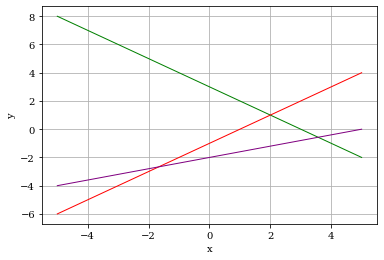

In [102]:
%matplotlib inline
x = np.linspace(-5, 5, 10) # start, finish, n points
y1 = 3 - x
y2 = -1 + x
y3 = -2 + (2/5)*x

fig, ax = plt.subplots()
plt.xlabel('x')
plt.ylabel('y')
ax.plot(x, y1, c='green')
ax.plot(x, y2, c='red')
ax.plot(x, y3, c='purple')
plt.grid(True)

### b. Undertermined Systems of Linear Equations
- An underdetermined system of equations is a system in which the number of equations is less than the number of unknowns. 
- Such a system cannot be solved using simple matrix inversion method, as the coefficient matrix is not square and thus cannot be inverted. 
- In deep learning many a times we have underdetermined systems that we need to solve. For example, we have thousands of training data points, while there are millions of parameters in the model.

 <h3 align="center">$ A_{n\times m}\hspace{.2 cm}x_{m\times 1}\hspace{.3 cm}=\hspace{.3 cm}b_{n\times 1} \hspace{1 cm}$ and $ \hspace{.3 cm}n\hspace{.3 cm}\lt\hspace{.3 cm}m$ </h3>

**Consistent Underdetermined System having `Infinite` Solution:**
$$x+y=3$$
- A single equation having two unknowns is an example of undertermined system of linear equation. If you plot it you get a straight line and there are infinite many points that satisfies this equation.

**InConsistent Underdetermined System:**
$$x+2y+2z=2$$
$$x+2y+2z=4$$
- This is an example of underdetermined system of linear equations having two equations and three unknowns. 
- We have seen that an equation having three variables when plotted gives you a plane.
- Since both the equations have same coefficient, but different constants so these two equations represent two parallel planes in 3D space with no common point. So no solution. 
- Therefore, this system of liner equation is inconsistent.

## 6. Solving Inconsistent Overdetermined System of Linear Equations using Least Squares

### a. Modeling Linear Equation in Machine Learning with Two Variables
| Dependent Variable ($y$) | Independent Variable ($x$) |
| ----------- | ----------- |
| GPA of a student | Number of hours studied daily |
| Forgetness level | Drug dosage in ml |
| Salary of a person | Number of Education years |
| House price | Covered area of the house |
| Electricity Bill | Amount of electricity consumed |
| Distance travelled | Time |
| Sales | Advertising Expenditures |

- This relationship can be represented in the following format in machine learning:
<h3>${\hspace 9 cm}y = c + mx $</h3>
<h3>${\hspace 9 cm}y = \beta_0 + \beta_1x $</h3>

### b. Modeling Linear Equation in Machine Learning with `m` Variables
| Dependent Variable ($y$) | Independent Variable ($x_1$) |Independent Variable ($x_2$) |Independent Variable ($x_3$) |
| ----------- | ----------- |----------- | ----------- |
| GPA of a student | Number of hours studied daily | Teaching Aids | Instructor Qualification|
| Forgetness level | Drug dosage in ml |Social bindings | Family Environment|
| Salary of a person | Number of Education years |Managerial skills | Communication skills|
| House price | Covered area of the house |Number of bed rooms | distance from office|
| Electricity Bill | Amount of electricity consumed |Loadshedding | Billing slabs|
| Distance travelled | Time |type of car | traffic conditions|
| Sales of AC | Advertising Expenditures |Marketing | Season|


- This relationship can be represented in the following format in machine learning:

<h3>${\hspace 9 cm}y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_3 + \cdots + \beta_mx_m $</h3>


- Where, 
    - $y$ is the dependent or outcome or response variable.
    - $x_1, x_2, x_3, \cdots, x_m$ are the independent or feature or predictor variables.
    - $\beta_0$ is the minimum value of $y$ when all the feature variables are zero.
    - $\beta_1, \beta_2, \beta_3, \cdots, \beta_m$  are the values that quantify the effect of respective independent variables on the output or dependent variable.  

### c. Simple Linear Regression using Least Squares Method

<img align="right" width="400" height="400"  src="images/LA/linear_regression.png"  >

#### <center> A `Simple Linear Regression Model` is a mathematical equation that allows us to predict the output/response/dependent variable for a given input/predictor/independent variable. </center>
<h3>$\hspace{7 cm}y = \beta_0 + \beta_1x + \epsilon$</h3>

$\hspace{7 cm}\epsilon_i = \hat{y_i} - y_i = 0$


- **Simple** means there is one independent and on dependent variable, e.g., the GPA of a student depends only on the number of study hours.
- **Linear** means the relationship is approximated/described using straight line.
- **Regression** allows us means a measure of the relation between the mean value of one variable (e.g. output) and corresponding values of other variables.


<br><br>

#### <center>The method of `Linear Least Squares` is a statistical procedure to approximate the solution of Inconsistent overdetermined systems by minimizing the sum of the offsets of points from the plotted curve. </center>

<h3>$$\hspace{2 cm} \beta_1 = \frac{cov(x,y)}{var(x)} = \frac{\frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }{n}}           {\frac{\sum(x_i-\bar{x})^2}{n}}   = \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n(x_i - \bar{x})^2}$$</h3>

<h3>$$\hspace{2 cm} \beta_0 = \bar{y} - \beta_1\bar{x}$$</h3>

**Example 17:**
- Consider that a teacher has collected a sample data of seven students, their GPA and the number of hours they have studied on daily basis in the entire semester.
- Suppose, a teacher want to determine the relationship between the two variables `GPA` and `study hours` is positive or negative.
- The teacher also wants to determine how much impact the dependent variable `study hours` has on the independent variable `GPA`
- For this she has collected a sample data of seven students as tupple containing (`daily study hours` and `acquired GPA`):
 $$(1,\hspace{.2 cm}1.4), \hspace{.5 cm}(2,\hspace{.2 cm}1.6),\hspace{.5 cm}(3,\hspace{.2 cm}2.5),\hspace{.5 cm}(4,\hspace{.2 cm}2.6), \hspace{.5 cm}(5,\hspace{.2 cm}3.5),\hspace{.5 cm}(6,\hspace{.2 cm}3.7),\hspace{.5 cm}(7,\hspace{.2 cm}4.0) $$

>- **`Step 1:` Plot the seven observations using a scatter chart:**

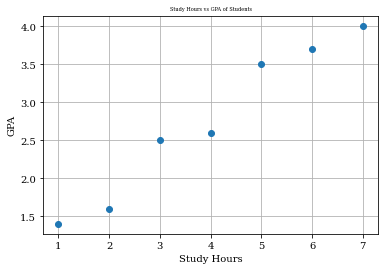

In [103]:
sh = np.array([1, 2, 3, 4, 5, 6, 7.])               # study hours 
gpa = np.array([1.4, 1.6, 2.5, 2.6, 3.5, 3.7, 4.0])   # gpa
fig, ax = plt.subplots()
plt.title("Study Hours vs GPA of Students")
plt.xlabel("Study Hours")
plt.ylabel("GPA")
ax.scatter(sh,gpa)
plt.grid(True)

- From the graph, we can note that if a student study 2 hours daily, he/she gets a GPA of 1.6. Similarly, if a student studies 7 hours daily, he or she gets a GPA of 4.0
- So, it appears that there exist a positive relationship between the study hours and GPA achieved.
- However, by just seeing the graph it appears that there exist no straight line or in other words no single equation that passes through all the seven points.

>- **`Step 2:` Write down seven linear equations, one for each observation/point:**

$$(1,1.4), \hspace{.5 cm} (2,1.6), \hspace{.5 cm}(3,2.5), \hspace{.5 cm}(4,2.6),  \hspace{.5 cm}(5,3.5), \hspace{.5 cm}(6,3.7), \hspace{.5 cm}(7,4.0) $$
$$y=c+mx$$ 
$$y = \beta_0 + \beta_1x + \epsilon$$
- Where,
    - $\beta_0$ is the y-intercept
    - $\beta_1$ is the slope of the line 
    - $\epsilon_i = \hat{y}_i - y_i$, For a given instance $i$, $\epsilon_i$ is a measure of the difference between the true $y_i$ and the model's estimate, $\hat{y}_i$. If the model predicts $y_i$ perfectly, then the error is zero

   
- Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**.  Our objective is to find the parameters $\beta_0$ and $\beta_1$ that minimize $\epsilon$ across all the available data points. 

- Mention the seven equations for the seven points, having two unknowns: y-intercept ($\beta_0$) and slope ($\beta_1$)

$$f(1):\hspace{1 cm}\beta_0 + \beta_1 = 1.4$$
$$f(2):\hspace{1 cm}\beta_0 + 2\beta_1 = 1.6$$
$$f(3):\hspace{1 cm}\beta_0 + 3\beta_1 = 2.5$$
$$f(4):\hspace{1 cm}\beta_0 + 4\beta_1 = 2.6$$
$$f(5):\hspace{1 cm}\beta_0 + 5\beta_1 = 3.5$$
$$f(6):\hspace{1 cm}\beta_0 + 6\beta_1 = 3.7$$
$$f(7):\hspace{1 cm}\beta_0 + 7\beta_1 = 4.0$$


>- **Step 3: Create matrix equation from above seven equations: $Ax=b$**

- Let us write the above `Inconsistent Overdetermined System` of seven linear equations having two unknowns in matrix form.
$$
\begin{bmatrix} 1 & 1 \\  1 & 2 \\  1 & 3 \\ 1 & 4 \\  1 & 5 \\  1 & 6 \\ 1 & 7  \end{bmatrix}
\begin{bmatrix} \beta_0 \\ \beta_1  \end{bmatrix} =  
\begin{bmatrix} 1.4 \\ 1.6 \\ 2.5 \\ 2.6\\ 3.5 \\ 3.7 \\ 4.0  \end{bmatrix}
$$
- Since the y-intercept is constant, so we have set it equal to `1` across the board

- So the above equations can be written as:
$$Ax = b$$

- Where,
    - $A$ is a $7\times 2$ matrix of known coefficients.
    - $x$ is a $2\times 1$ vector of unknowns (y-intercept and slope)
    - $b$ is a $7\times 1$ vector of known independent or output variable values.

>- **`Step 4:` Solve the system of linear equations using Linear Least Squares Method:**

**Option 1:** Use Pearson Correlation coefficient, which is used to quantify the strength and direction of linear relationship between two quantitative variables
<h4>$$\hspace{2 cm} \beta_1 = \frac{cov(x,y)}{var(x)} = \frac{\frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }{n}}           {\frac{\sum(x_i-\bar{x})^2}{n}}   = \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n(x_i - \bar{x})^2}$$</h4>

<h4>$$\hspace{2 cm} \beta_0 = \bar{y} - \beta_1\bar{x}$$</h4>

In [104]:
x = np.array([1, 2, 3, 4, 5, 6, 7])
y = np.array([1.4, 1.6, 2.5, 2.6, 3.5, 3.7, 4.0])
N = 7 
xbar = sum(x)/N
ybar = sum(y)/N

b1 = (sum((x - xbar)*(y - ybar)))/(sum((x - xbar)**2))
b0 = ybar - b1*xbar
print("Slope: ", b1)
print("Y-intercept: ", b0)

Slope:  0.4642857142857143
Y-intercept:  0.8999999999999999


**Option 2:** Use `np.cov(x,y)` to calculate variance-covariance matrix. The diagornal values of the matrix show variances while the other values are the covariances. For two variables the covariance matrix is shown below:

$$\begin{bmatrix} \sigma(x,x) & \sigma(x,y) \\  \sigma(y,x) & \sigma(y,y)  \end{bmatrix}$$

$ b_1 = \frac{\sigma(x,y)}{\sigma(x,x)}\hspace{2 cm}$ and  $ \hspace{2 cm}b_0 = \bar{y} - b_1\bar{x}$

In [105]:
# OPTION 2
x = np.array([1, 2, 3, 4, 5, 6, 7])
y = np.array([1.4, 1.6, 2.5, 2.6, 3.5, 3.7, 4.0])
cov_mat = np.cov(x, y)
print("Covariance matrix: \n",cov_mat)

b1 = cov_mat[0,1]/cov_mat[0,0]       #slope = cov(x,y)/var(x)
b0 = sum(y)/N  - b1 * sum(x)/N

print("\nSlope: ", b1)
print("Y-intercept: ", b0)

Covariance matrix: 
 [[4.66666667 2.16666667]
 [2.16666667 1.04285714]]

Slope:  0.4642857142857143
Y-intercept:  0.8999999999999999


>- **`Step 5:`Draw the regression line using the computed slope and y-intercept, which is the best fit line**

$$y = 0.9 + 0.464*x $$

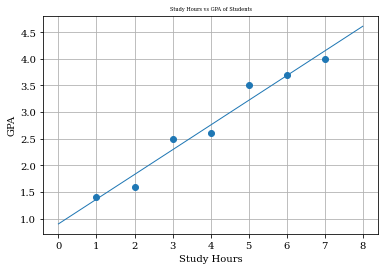

In [106]:
x = np.array([1, 2, 3, 4, 5, 6, 7])       
y = np.array([1.4, 1.6, 2.5, 2.6, 3.5, 3.7, 4.0])  
fig, ax = plt.subplots()
plt.title("Study Hours vs GPA of Students")
plt.xlabel("Study Hours")
plt.ylabel("GPA")
ax.scatter(sh,gpa);

x2 = np.linspace(0,8, 10)
b0 = 0.9
b1 = 0.464
y2 = b0 + b1*x2
ax.plot(x2,y2)
plt.grid(True)

>- **`Step 6:`Perform prediction**
- You can perform prediction from the graph. Given a x value you predict the value from the line and the actual data point. Note the difference between the predicted value and the actual value.

>- **`Step 7:` Finally calculate the least square errors to determine how well the regression line actually fits the data:**

- **R-squared Error/Coefficient of Determination**. Tells us how well the regression line fit the data.  can range from 0 to 1. A value of 0 indicates that the response variable cannot be explained by the predictor variable at all. A value of 1 indicates that the response variable can be perfectly explained without error by the predictor variable.
$$R^2 = \frac{SSR}{SST}$$
- **Sum of Squares due to Regression (SSR)** is calculated as the sum of the squares deviations of each predicted value of y, i.e., $\hat{y}$, and subtract the avarage y, i.e., $\bar{y}$. So it measures the difference between the predicted values and its average.
$$SSR = \sum(\hat{y}_i - \bar{y})^2$$ 
- **Sum of Squares Total (SST)** is the total variation squared.
$$SST = SSR + SSE$$
- **Sum of Squares Error (SSE)** is the unexplained deviation:
$$SSE = \sum(\hat{y}_i - y_i)^2$$ 

In [107]:
x = np.array([1, 2, 3, 4, 5, 6, 7])       
y = np.array([1.4, 1.6, 2.5, 2.6, 3.5, 3.7, 4.0])  
yhat = b0 + b1*x 
sse = sum((yhat - y)**2)
ssr = sum((yhat- np.mean(y))**2)
sst = ssr + sse
r2 = ssr/sst
r2

0.9645681098359337

This tells us that 96.4% of the variation in GPA can be explained by the number of hours studied.

### Example 18
Given four observations of some random experiment, use paper pencil and calculate equation for the best fit linear regression line and calculate R-squared error to to determine how well the regression line fits the dataset. Finally write Python code to verify your answers.
    $$(-1, \hspace{.2 cm}0),\hspace{.5 cm} (0,\hspace{.2 cm} 1),\hspace{.5 cm}(1, \hspace{.2 cm}2), \hspace{.5 cm}(2,\hspace{.2 cm} 1) $$

- **Write down seven linear equations, one for each observation/point:**
$$f(-1): \beta_0 - \beta_1 = 0$$
$$f(0): \beta_0 + 0\beta_1 = 1$$
$$f(1): \beta_0 + 1\beta_1 = 2$$
$$f(2): \beta_0 + 2\beta_1 = 1$$


- **Create matrix equation from above seven equations: $Ax=b$**
$$
\begin{bmatrix} 1 & -1 \\  1 & 0 \\  1 & 1 \\ 1 & 2  \end{bmatrix}
\begin{bmatrix} \beta_0 \\ \beta_1  \end{bmatrix} =  
\begin{bmatrix} 0 \\ 1 \\ 2 \\ 1  \end{bmatrix}
$$

$$Ax = b$$


- **Solve the system of linear equations using pseudoinverse:**
$$A^TAx = A^Tb $$

$$
\begin{bmatrix} -1 & 0 & 1 & 2 \\  1 & 1 & 1 & 1 \end{bmatrix}
\begin{bmatrix} -1 & 1 \\  0 & 1 \\  1 & 1 \\ 2 & 1  \end{bmatrix}
\begin{bmatrix} \beta_0 \\ \beta_1  \end{bmatrix} =  
\begin{bmatrix} -1 & 0 & 1 & 2 \\  1 & 1 & 1 & 1 \end{bmatrix}
\begin{bmatrix} 0 \\ 1 \\ 2 \\ 1  \end{bmatrix}
$$




$$
\begin{bmatrix} 6 & 2 \\  2 & 4  \end{bmatrix}
\begin{bmatrix} \beta_0 \\ \beta_1  \end{bmatrix} =  
\begin{bmatrix} 4 \\ 4\end{bmatrix}
$$

$$Ax = b$$


$$Ax = b$$

$$x = A^{-1}b$$

$$x = \frac{1}{det(A)}\begin{bmatrix} 4 & -2\\ -2 & 6 \end{bmatrix} \begin{bmatrix} 4 \\ 4\end{bmatrix}$$

$$x = \frac{1}{20}\begin{bmatrix} 4 & -2\\ -2 & 6 \end{bmatrix} \begin{bmatrix} 4 \\ 4\end{bmatrix}$$

$$x = \begin{bmatrix} 1/5 & -1/10\\ -1/10 & 3/10 \end{bmatrix} \begin{bmatrix} 4 \\ 4\end{bmatrix}$$  

$$x = \begin{bmatrix} 2/5 \\ 4/5\end{bmatrix}$$
- Using this way, you get the same slope and y-intercept: $m=2/5$ and $c = 4/5$


Slope:  0.4
Y-intercept:  0.8
R-Squared Error:  0.4000000000000001


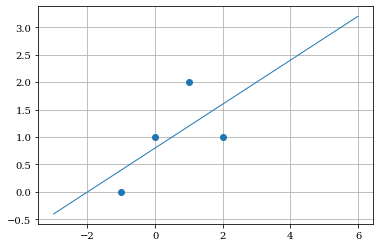

In [114]:
import scipy.stats
x = np.array([-1, 0, 1, 2])
y = np.array([0, 1, 2, 1])
result = scipy.stats.linregress(x,y)
b1 = result.slope
b0 = result.intercept
print("Slope: ", b1)
print("Y-intercept: ", b0)


yhat = b0 + b1*x
sse = sum((yhat - y)**2)
ssr = sum((yhat- np.mean(y))**2)
sst = ssr + sse
r2 = ssr/sst
print("R-Squared Error: ", r2)

fig, ax = plt.subplots()
ax.scatter(x, y);
x2 = np.linspace(-3,6, 10)
y2 = b0 + b1*x2
ax.plot(x2,y2)
plt.grid(True)

### Example 19
- Consider that a doctor has collected a sample data of eight patients, on which he/she has administered a special drug that is used to reduce the level of fogetfullness of a patient.
- Suppose, a doctor want to determine the relationship between the two variables `forgetness level` and `drug dosage` is positive or negative.
- The doctor also wants to determine how much impact the dependent variable `drug dosage` has on the independent variable `forgetness level`
- For this she has collected a sample data of eight patients as shown below:
 $$(0,\hspace{.2 cm}1.86),\hspace{.5 cm} (1,\hspace{.2 cm}1.31),\hspace{.5 cm}(2, \hspace{.2 cm}0.62),\hspace{.5 cm}(3, \hspace{.2 cm}0.33), \hspace{.5 cm}(4,\hspace{.2 cm}0.09),\hspace{.5 cm}(5,\hspace{.2 cm}-0.67),\hspace{.5 cm}(6, \hspace{.2 cm}-1.23), \hspace{.5 cm}(7,\hspace{.2 cm} -1.37) $$
 
- Write down Python code to plot the points, and use least squares method to calculate equation for the best fit linear regression line and calculate R-squared error to to determine how well the regression line fits the dataset. 

Slope:  -0.4692857142857143
Y-intercept:  1.76
R-Squared Error:  0.9834425543516645


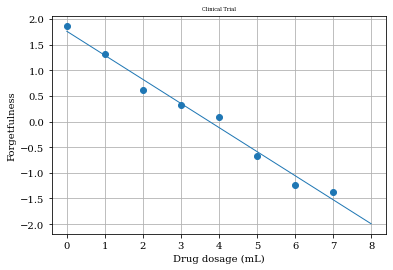

In [113]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7.])                         # Drug dosage in ml
y = np.array([1.86, 1.31, 0.62, 0.33, 0.09, -0.67, -1.23, -1.37])   # Level of forgetfullness

result = scipy.stats.linregress(x,y)
b1 = result.slope
b0 = result.intercept
print("Slope: ", b1)
print("Y-intercept: ", b0)


yhat = b0 + b1*x
sse = sum((yhat - y)**2)
ssr = sum((yhat- np.mean(y))**2)
sst = ssr + sse
r2 = ssr/sst
print("R-Squared Error: ", r2)



fig, ax = plt.subplots()
plt.title("Clinical Trial")
plt.xlabel("Drug dosage (mL)")
plt.ylabel("Forgetfulness")
ax.scatter(x, y)

x2 = np.linspace(0, 8, 10)
y2 = result.slope*x2 + result.intercept
ax.plot(x2,y2)
plt.grid(True)

### d. Multiple Linear Regression using Ordinary Least Squares (OLS) Method

#### Equation for Multiple Linear Regression
- The equation of multiple linear regression can be written as:
<h3>${\hspace 9 cm}\beta_0 + x_1\beta_1 + x_2\beta_2 + x_3\beta_3 + \cdots + x_m\beta_m = y$</h3>


- Where, 
    - $y$ is the dependent or outcome or response variable, e.g., gpa achieved (**known**).
    - $x_1, x_2, x_3, \cdots, x_m$  are the predictor variables, e.g., study hours, instructor teaching skills, lab work and so on (**known**).
    - $\beta_0$ is the minimum value of $y$ when all the feature variables are zero, e.g., minimum gpa achived by a student. Also called the y-intercept (**unknown**).
    - $\beta_1, \beta_2, \beta_3, \cdots, \beta_m$ are the model parameters that we want to determine (**unknown**).

#### Overdetermined System having `n` Equations and `m` Variables
- Suppose we have `n` observations, or `n` data points one for each student. So this system of of `n` linear equations involving `m` variables can be written as:

$$\beta_0 + x_{1,1}\beta_1 + x_{1,2}\beta_2 + x_{1,3}\beta_3 + \cdots + x_{1,m}\beta_m = y_1$$
$$\beta_0 + x_{2,1}\beta_1 + x_{2,2}\beta_2 + x_{2,3}\beta_3 + \cdots + x_{2,m}\beta_m = y_2$$
$$\beta_0 + x_{3,1}\beta_1 + x_{3,2}\beta_2 + x_{3,3}\beta_3 + \cdots + x_{3,m}\beta_m = y_3$$
$$\cdots \hspace{1 cm} \cdots \hspace{1 cm}   \cdots \hspace{1 cm} \cdots \hspace{1 cm}\cdots\hspace{1 cm} \cdots $$
$$\cdots \hspace{1 cm} \cdots \hspace{1 cm}   \cdots \hspace{1 cm} \cdots \hspace{1 cm}\cdots\hspace{1 cm} \cdots $$
$$\beta_0 + x_{n,1}\beta_1 + x_{n,2}\beta_2 + x_{n,3}\beta_3 + \cdots + x_{n,m}\beta_m = y_n$$

#### Writing in Matrix Form
- Let us write above set of linear equations in matrix form, by keeping a 1 for the unknown variable `a`, which is the minimum gpa that a student can get<br>

$$
\begin{bmatrix} 1 & x_{1,1} & x_{1,2} & x_{1,3} & \cdots & x_{1,m} \\
                1 & x_{2,1} & x_{2,2} & x_{2,3} & \cdots & x_{2,m} \\
                1 & x_{3,1} & x_{3,2} & x_{3,3} & \cdots & x_{3,m}  \\
                \vdots  & \vdots  & \vdots & \vdots & \ddots & \vdots \\
                1 & x_{n,1} & x_{n,2} & x_{n,3} & \cdots & x_{n,m}  
\end{bmatrix}
\begin{bmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \\ \vdots \\ \beta_m  \end{bmatrix} =
\begin{bmatrix} y_1 \\ y_2 \\ y_3 \\ \vdots \\ y_n  \end{bmatrix}
$$

$$ Ax = b$$
- The matrix $A$ is known. For example, each row contains the value of study hours, instruction teaching skills, lab work and so on.
- The vector $x$ is unknown, called the model's learnable parameters.
- The vector $b$ is known. For example, each $y_i$ is the known gpa of a student.

**Example 20:**
- Consider that a teacher has collected a sample data of seven students, their GPA (0-4), the number of hours they have studied on daily basis in the entire semester (0-7) and instructor teaching skills (0-4).
- For this she has collected a sample data of seven students as tupple containing (`daily study hours`, `instructor teaching skills` and `acquired GPA`):
$$
(1,\hspace{.2 cm}4, \hspace{.2 cm}2.4),\hspace{.5 cm}
(2,\hspace{.2 cm}1, \hspace{.2 cm}2.2),\hspace{.5 cm}
(3,\hspace{.2 cm}3, \hspace{.2 cm}2.9),\hspace{.5 cm}
(4,\hspace{.2 cm}4, \hspace{.2 cm}3.8),\hspace{.5 cm}
(5,\hspace{.2 cm}3, \hspace{.2 cm}3.0),\hspace{.5 cm}
(6,\hspace{.2 cm}1, \hspace{.2 cm}2.0),\hspace{.5 cm}
(7,\hspace{.2 cm}2, \hspace{.2 cm}3.0),\hspace{.5 cm}
$$

>- **Write down seven linear equations, one for each observation/point:**
- There are a total of seven observations.
- We need to predict the `GPA` based on two feature or input or predictor variables, `study_hours` and `instr_teaching_skills`.
- The regression equation for this situation is:
$$\beta_0 + x_1\beta_1 + x_2\beta_2  = y$$
- In this example of multiple regression, $\beta_0$, $\beta_1$, and $\beta_2$ are called the **model coefficients**.  

- The seven equations for the seven data points, makes up a system of overdetermined system as shown below:
$$\beta_0 +  \beta_1 + 4\beta_2  = 2.4$$
$$\beta_0 + 2\beta_1 + \beta_2  = 2.2$$
$$\beta_0 + 3\beta_1 + 3\beta_2  = 2.9$$
$$\beta_0 + 4\beta_1 + 4\beta_2  = 3.8$$
$$\beta_0 + 5\beta_1 + 3\beta_2  = 3.0$$
$$\beta_0 + 6\beta_1 + 1\beta_2  = 2.0$$
$$\beta_0 + 7\beta_1 + 2\beta_2  = 3.0$$

>- **Create matrix equation from above seven equations: $Ax=b$**
- Let us write the above `Inconsistent Overdetermined System` of seven linear equations having two unknowns in matrix form.
$$
\begin{bmatrix} 1 & 1 & 4\\  1 & 2 &1\\  1 & 3 &3\\ 1 & 4 &4\\  1 & 5 &3 \\  1 & 6 &1\\ 1 & 7 &2 \end{bmatrix}
\begin{bmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \end{bmatrix} =  
\begin{bmatrix} 2.4 \\ 2.2 \\ 2.9 \\ 3.8\\ 3.0 \\ 2.0 \\ 3.0  \end{bmatrix}
$$
- Since the y-intercept is constant, so we have set it equal to `1` across the board

- So the above equations can be written as:
$$Ax = b$$

- Where,
    - $A$ is a $7\times 3$ matrix of known coefficients.
    - $x$ is a $3\times 1$ vector of unknowns.
    - $b$ is a $7\times 1$ vector of known independent or output variable values.

>- **Solve the system of linear equations using Ordinary Least Squares Method:**

In [108]:
import numpy as np
sh = np.array([1,     2,    3,    4,    5,    6,    7.])               # study hours 
skills = np.array([4, 1,    3,    4,    3,    1,    2])               # instructor's teaching skills
gpa = np.array([2.4,  2.2,  2.9,  3.8,  3.0,  2.0,  3.0])            # gpa
X = np.array(list(zip(sh,skills)))
y = gpa
print("Input Variables (sh, skills):\n", X)
print("\nOutput Variable (gpa):", y)

Input Variables (sh, skills):
 [[1. 4.]
 [2. 1.]
 [3. 3.]
 [4. 4.]
 [5. 3.]
 [6. 1.]
 [7. 2.]]

Output Variable (gpa): [2.4 2.2 2.9 3.8 3.  2.  3. ]


- **Use `LinearRegression()` method of scikit-learn Library**

In [109]:
from sklearn.linear_model import LinearRegression
#initiate linear regression model
model = LinearRegression()

#fit regression model
model.fit(X, y)


#display regression coefficients and R-squared value of model
intercept = model.intercept_
sh_coef = model.coef_[0]
skill_coef = model.coef_[1]
r2 = model.score(X,y)

print('Intercept: ', intercept)
print('Coeffient of Study hour: ', sh_coef)
print('Coeffient of Instructor Teaching Skills: ', skill_coef)
print('R-Squared Errors: ', r2)

Intercept:  1.1627118644067802
Coeffient of Study hour:  0.13983050847457615
Coeffient of Instructor Teaching Skills:  0.40254237288135586
R-Squared Errors:  0.6464164339675734


- So the equation for the fitted regression model:<br>
$\hspace{1 cm}y \hspace{.3 cm}=\hspace{.3 cm} \hspace{.3 cm}1.16 \hspace{.3 cm}+\hspace{.3 cm} 0.1398 \hspace{.1 cm}$(study_hours) $\hspace{.3 cm} + 0.402 \hspace{.1 cm}$(instr_skills)

- We can also see that the R2 value of the model is 0.64. This means that 64% of the variation in the response variable can be explained by the two predictor variables in the model.

In [112]:
# Carry out the prediction with new study hours and instructor's teaching skills
gpa = intercept + sh_coef*1 + skill_coef*2
gpa = model.predict([[1, 1]])

print("GPA: ", gpa)

GPA:  [1.70508475]


**Example 21:**
- There are a total of 24 observations in a file `datasets/stockdata.csv`, containing year, month, interest_rate, unemployment_rate, and stock_index_prices.
- We need to predict the `stock_index_price` based on two feature variables, `interest_rate`, and `unemployment_rate`.

In [ ]:
! cat datasets/stockdata.csv

>- **Write down 24 linear equations, one for each observation/point:**
$$\beta_0 + 2.75\beta_1 + 5.3\beta_2  = 1464$$
$$\beta_0 + 2.5\beta_1 + 5.3\beta_2  = 1394$$
$$\beta_0 + 2.5\beta_1 + 5.3\beta_2  = 1357$$
$$\cdots \hspace{1 cm}   \cdots \hspace{1 cm}  \cdots $$
$$\cdots \hspace{1 cm}   \cdots \hspace{1 cm}  \cdots $$
$$\beta_0 + 1.75\beta_1 + 6.1\beta_2 = 719$$

>- **Create matrix equation from above seven equations: $Ax=b$**
$$
\begin{bmatrix} 1 & 2.75 & 5.3 \\
                1 & 2.5 & 5.3  \\
                1 & 2.5 & 5.3   \\
                \vdots  & \vdots  & \vdots \\
                1 & 1.75 & 6.1   
\end{bmatrix}
\begin{bmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \end{bmatrix} =
\begin{bmatrix} y_1 \\ y_2 \\ y_3 \\ \vdots \\ y_{24}  \end{bmatrix}
$$

$$ Ax = b$$

>- **Solve the system of linear equations using Ordinary Least Squares Method:**

In [ ]:
dataset = np.genfromtxt("datasets/stockdata.txt", delimiter=',')
# Two input or dependent or predictor variables are interest_rate and unemployment_rate
X = dataset[:,2:4]
X

In [ ]:
# The only independent or response variable is stock_index_price
Y = dataset[:,4]
Y

In [ ]:
# Use sklearn to determine the y-intercept and two model coefficients
import sklearn.linear_model
regr = sklearn.linear_model.LinearRegression()
regr.fit(X, Y)



intercept = regr.intercept_          # beta0
interest_rate_coef = regr.coef_[0]      # beta1
unemployment_rate_coef = regr.coef_[1]  # beta2


print('Intercept: ', intercept)
print('Coeffient of Interest Rate: ', interest_rate_coef)
print('Coeffient of Unemployment Rate: ', unemployment_rate_coef)

In [ ]:
# Carry out the prediction with new interest_rate and unemployment_rate
stock_index_price = intercept + interest_rate_coef*2.75 + unemployment_rate_coef*5.3
stock_index_price = regr.predict([[2.75, 5.3]])

stock_index_price